                 SURDURULEBILIR ULASIM - ELEKTRIKLI ARABALAR

Veri setinin içeriği, farklı bölgelerdeki elektrikli ve elektrikli olmayan araçların sayısını, tarihlerini ve yüzdelerini içeriyor.

Kutuphaneleri yukleme

In [1]:
pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#veri setini yukleme
df =pd.read_csv('C:/Users/gzman/Downloads/Electric_Vehicle_Population_Size_History_By_County.csv')

In [5]:
#ilk ve son datayi yazdirip kontrol etme
df.head(-5)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2024-05-31,Douglas,CO,Passenger,0,2,2,41,43,4.65
1,2024-05-31,Suffolk,VA,Passenger,1,0,1,81,82,1.22
2,2024-05-31,Pulaski,AR,Passenger,2,0,2,15,17,11.76
3,2024-05-31,Alexandria,VA,Passenger,3,0,3,74,77,3.90
4,2024-05-31,Lake,IN,Passenger,0,1,1,4,5,20.00
...,...,...,...,...,...,...,...,...,...,...
21872,2017-01-31,Allegheny,PA,Passenger,1,0,1,94,95,1.05
21873,2017-01-31,Muscogee,GA,Passenger,0,1,1,265,266,0.38
21874,2017-01-31,Cascade,MT,Passenger,0,1,1,65,66,1.52
21875,2017-01-31,Hardin,KY,Passenger,0,1,1,123,124,0.81


In [9]:
df.dtypes

Date                                         object
County                                       object
State                                        object
Vehicle Primary Use                          object
Battery Electric Vehicles (BEVs)              int64
Plug-In Hybrid Electric Vehicles (PHEVs)      int64
Electric Vehicle (EV) Total                   int64
Non-Electric Vehicle Total                    int64
Total Vehicles                                int64
Percent Electric Vehicles                   float64
dtype: object

In [11]:
# Veri setinin özet istatistiklerini görüntüleme
df.describe()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
count,21882.000000,21882.000000,21882.000000,2.188200e+04,2.188200e+04,21882.000000
mean,226.945343,82.195686,309.141029,2.469984e+04,2.500898e+04,4.166832
std,2412.667792,678.443578,3082.267616,1.058390e+05,1.082976e+05,10.905919
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,0.000000,0.000000,1.000000,4.200000e+01,4.400000e+01,0.410000
50%,1.000000,1.000000,1.000000,1.520000e+02,1.550000e+02,1.280000
75%,3.000000,2.000000,4.000000,8.112000e+03,8.201250e+03,3.190000
max,76949.000000,18885.000000,95829.000000,1.399622e+06,1.430737e+06,100.000000


In [13]:
df.isnull().sum()

Date                                         0
County                                      89
State                                       89
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

bolsuklari doldurma

In [16]:
# Her State için en sık görülen County adını bulma ve eksik değerleri doldurma
df['County'] = df.groupby('State')['County'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# State sütunundaki eksik değerleri en sık görülen değerle doldurma
most_frequent_state = df['State'].mode()[0]
df['State'].fillna(most_frequent_state, inplace=True)

# Eksik değerlerin doldurulup doldurulmadığını kontrol etme
missing_county_after = df['County'].isnull().sum()
missing_state_after = df['State'].isnull().sum()

print(f'Missing County values after filling: {missing_county_after}')
print(f'Missing State values after filling: {missing_state_after}')


Missing County values after filling: 89
Missing State values after filling: 0


In [18]:
# Her county için en sık görülen state adını bulma ve eksik değerleri doldurma
df['County'] = df.groupby('State')['County'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Veri setindeki genel en sık görülen County adını bulma ve eksik değerleri doldurma
most_frequent_county = df['County'].mode()[0]
df['County'].fillna(most_frequent_county, inplace=True)

# Eksik değerlerin doldurulup doldurulmadığını kontrol etme
missing_county_after = df['County'].isnull().sum()
missing_state_after = df['State'].isnull().sum()

print(f'Missing County values after filling: {missing_county_after}')
print(f'Missing State values after filling: {missing_state_after}')

Missing County values after filling: 0
Missing State values after filling: 0


In [20]:
df.isnull().sum()

Date                                        0
County                                      0
State                                       0
Vehicle Primary Use                         0
Battery Electric Vehicles (BEVs)            0
Plug-In Hybrid Electric Vehicles (PHEVs)    0
Electric Vehicle (EV) Total                 0
Non-Electric Vehicle Total                  0
Total Vehicles                              0
Percent Electric Vehicles                   0
dtype: int64

    **ANALIZ** 

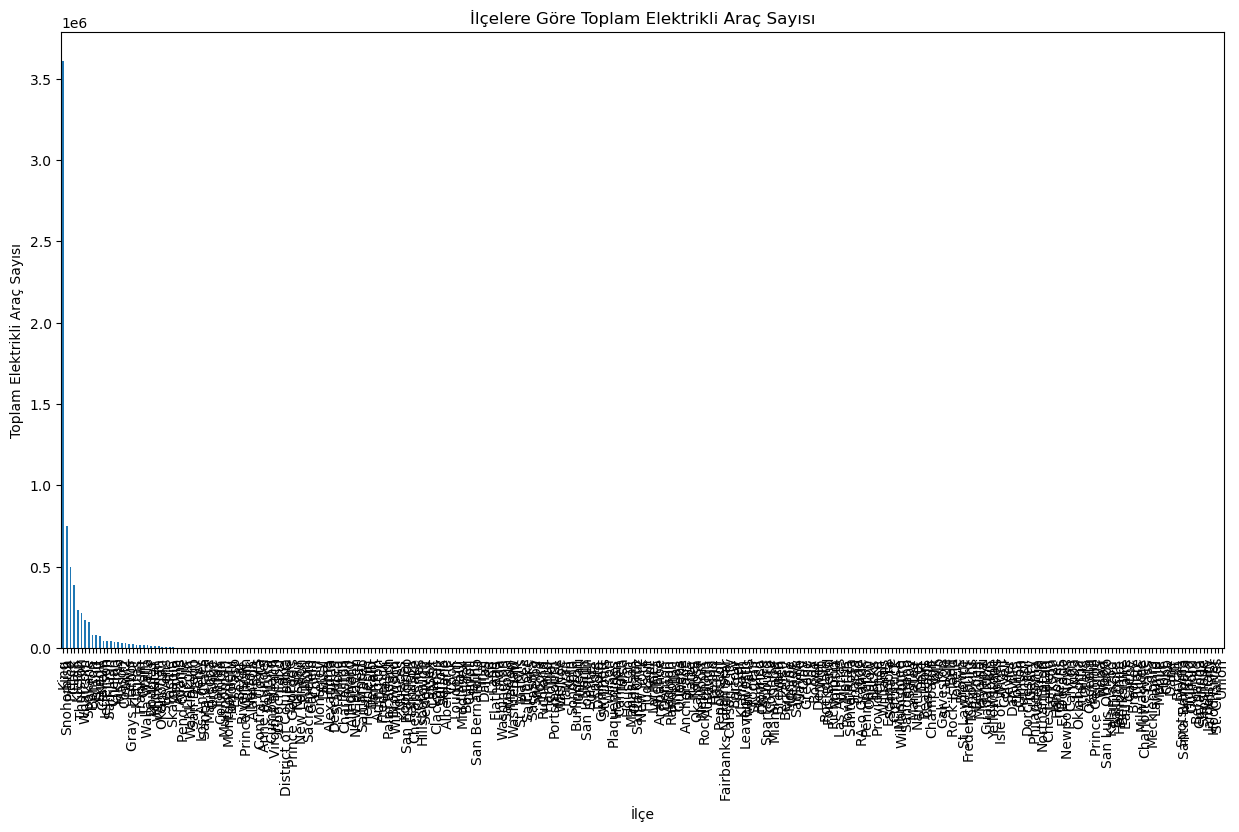

In [23]:
# Farklı bölgelerdeki elektrikli araç popülasyonunu karşılaştırma
county_group = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
county_group.plot(kind='bar')
plt.title('İlçelere Göre Toplam Elektrikli Araç Sayısı')
plt.xlabel('İlçe')
plt.ylabel('Toplam Elektrikli Araç Sayısı')
plt.show()


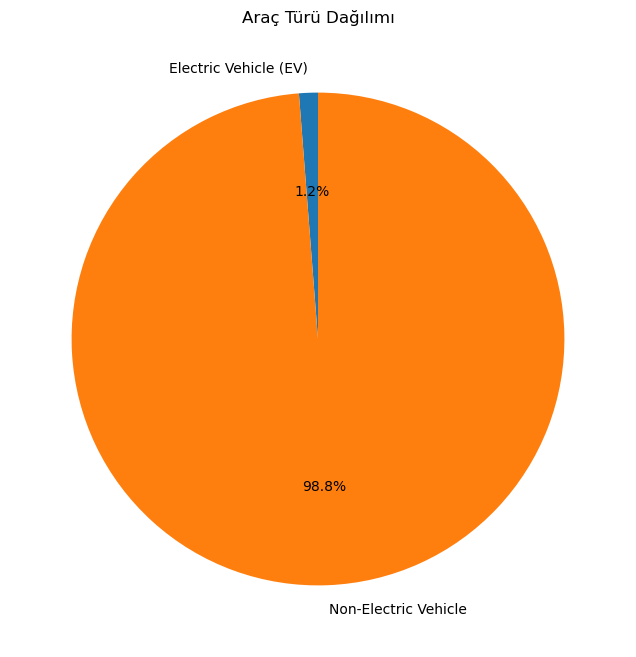

In [24]:

# Elektrikli ve elektrikli olmayan araçların toplamını alalım
ev_total = df['Electric Vehicle (EV) Total'].sum()
non_ev_total = df['Non-Electric Vehicle Total'].sum()

# Bu değerleri bir veri çerçevesinde toplayalım
vehicle_totals = pd.Series({'Electric Vehicle (EV)': ev_total, 'Non-Electric Vehicle': non_ev_total})

# Pasta grafiğini oluşturalım
plt.figure(figsize=(8, 8))
vehicle_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Araç Türü Dağılımı')
plt.ylabel('')
plt.show()


Elektrikli araç oranı %10'dan fazla olan şehir sayısı: 80


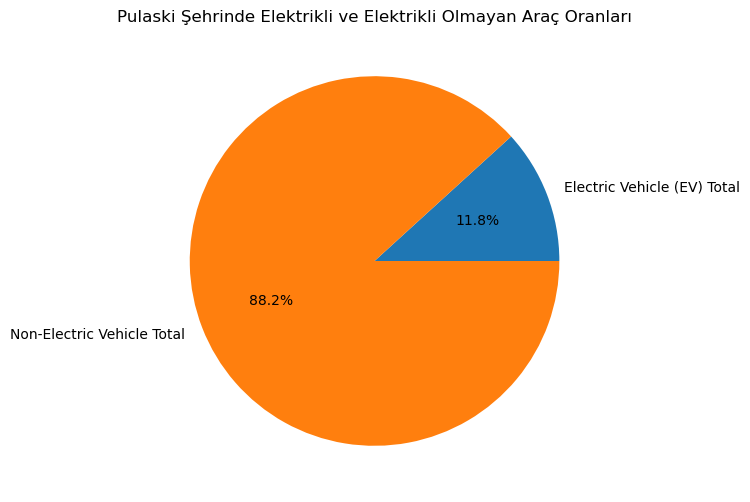

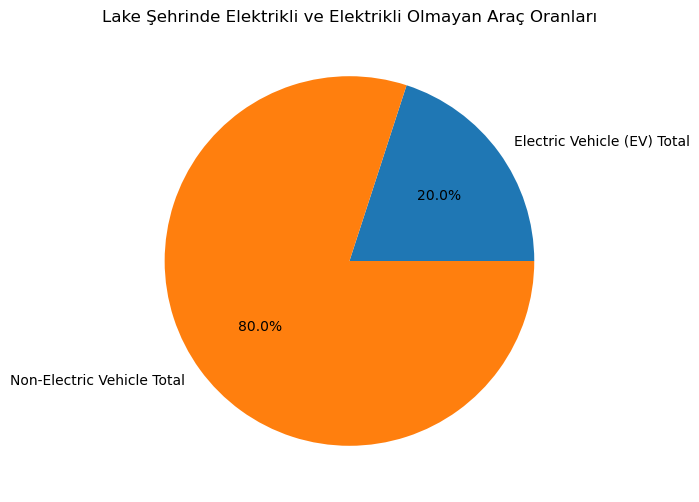

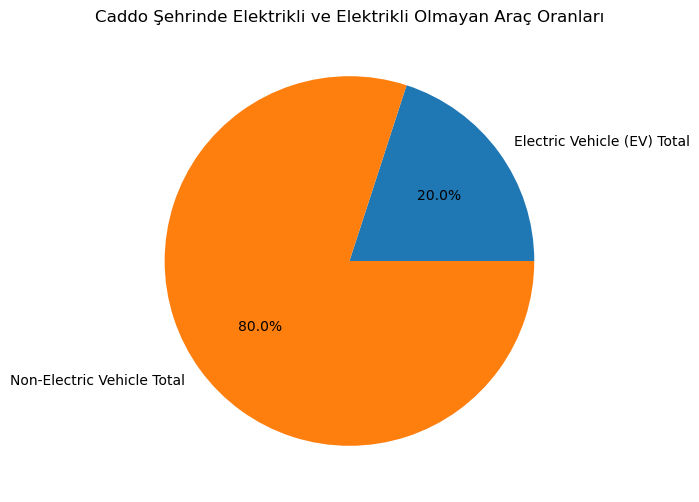

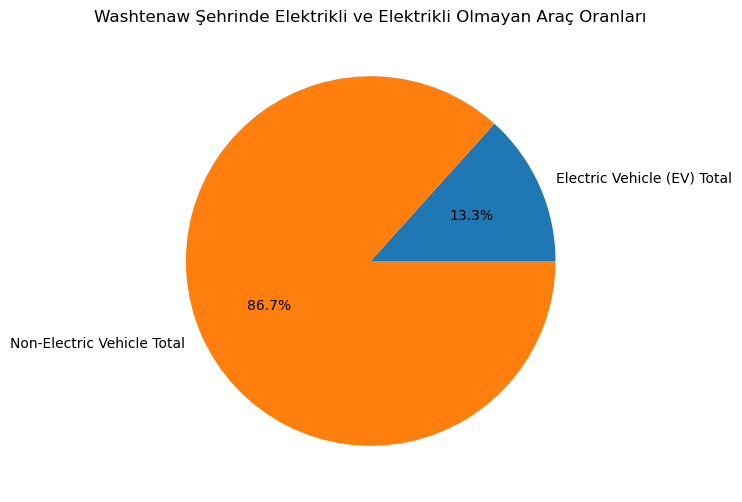

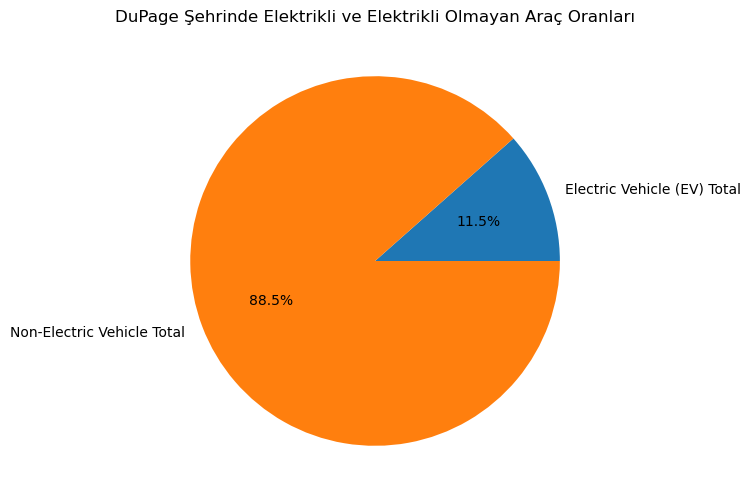

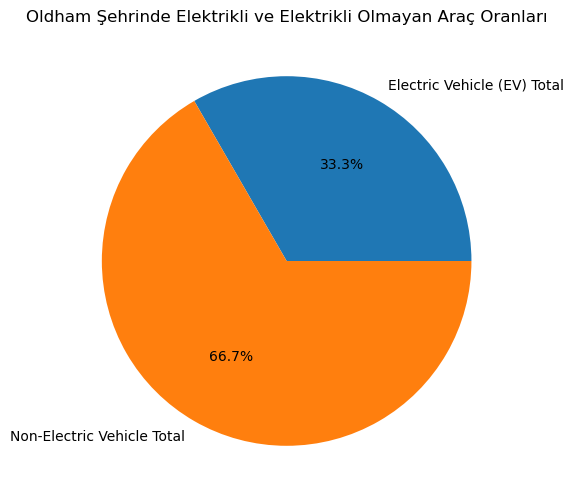

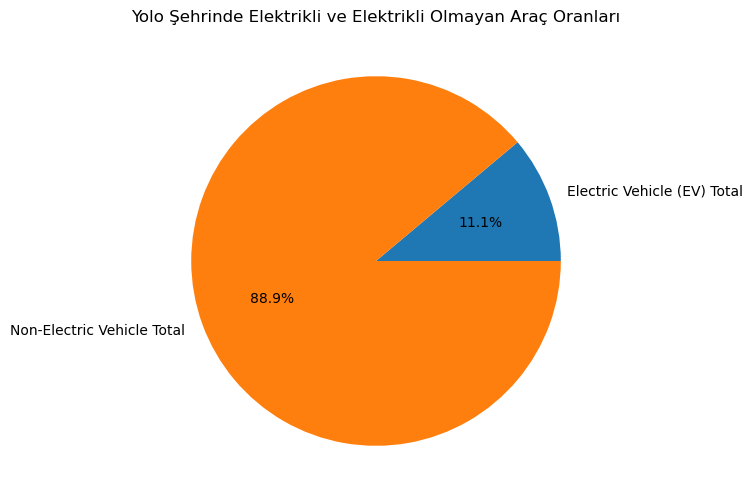

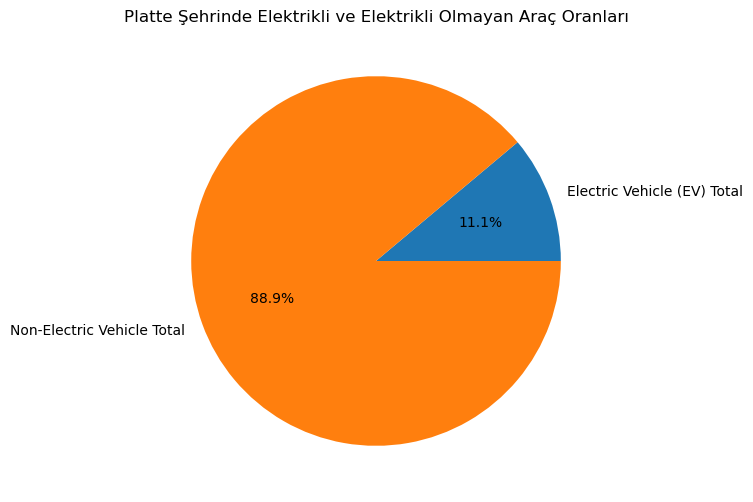

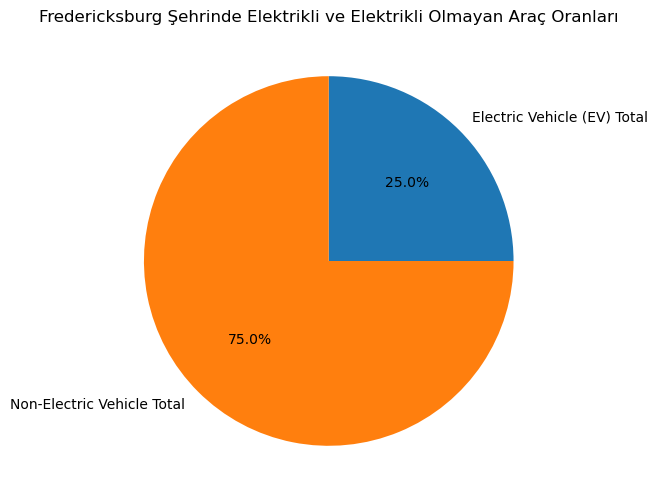

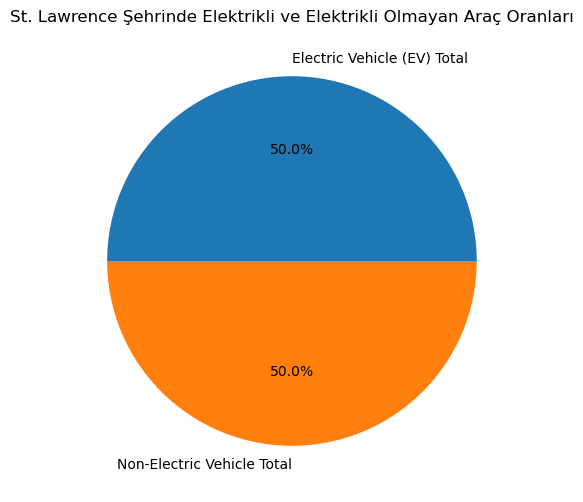

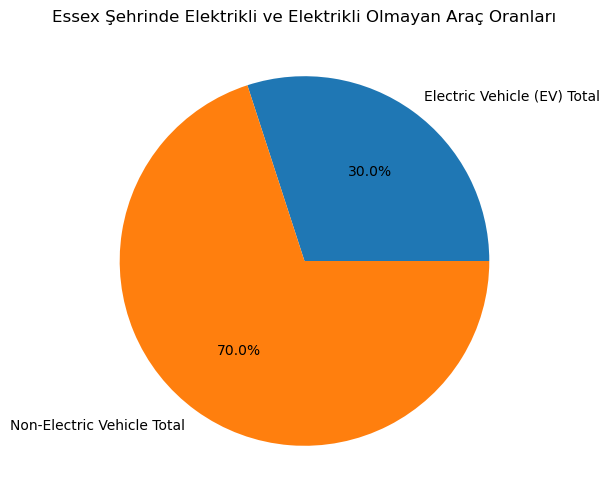

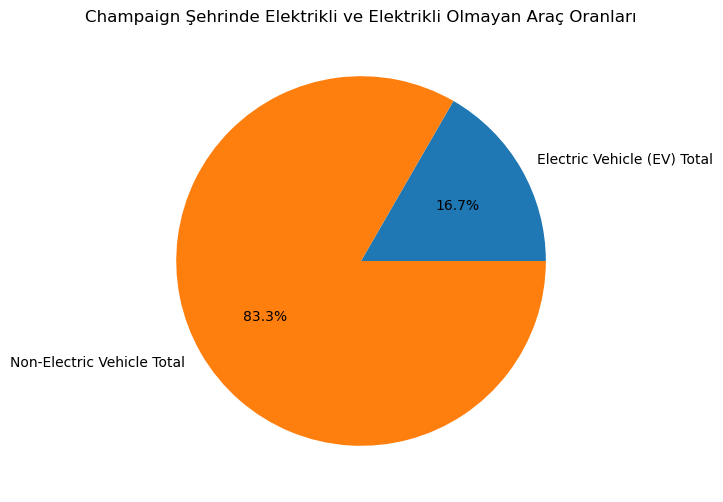

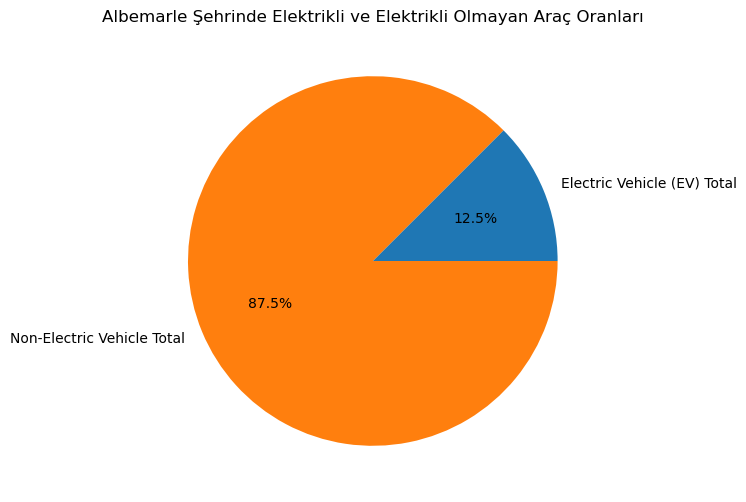

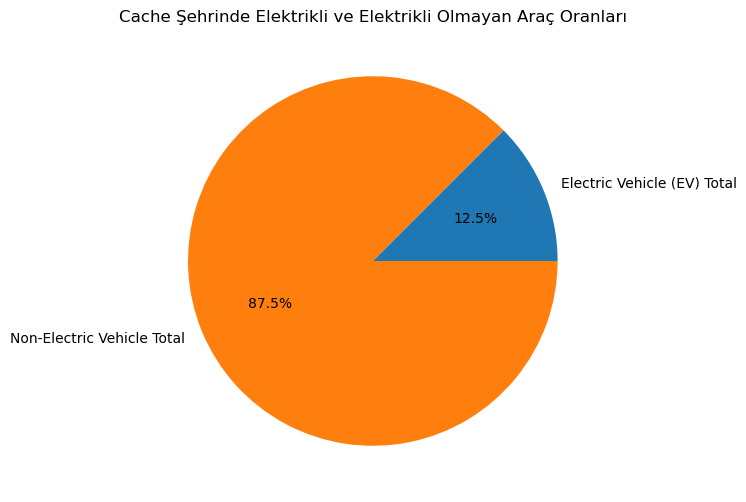

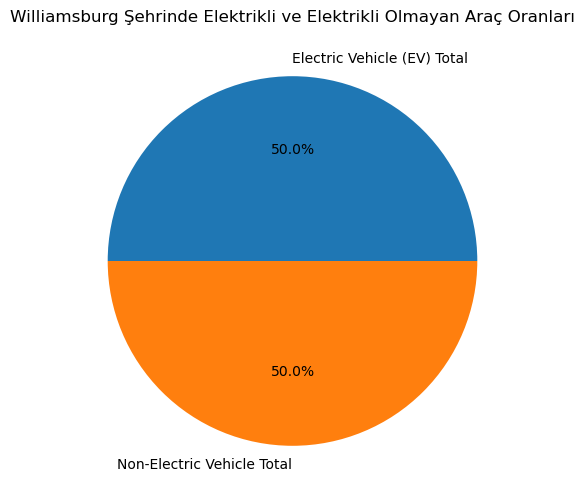

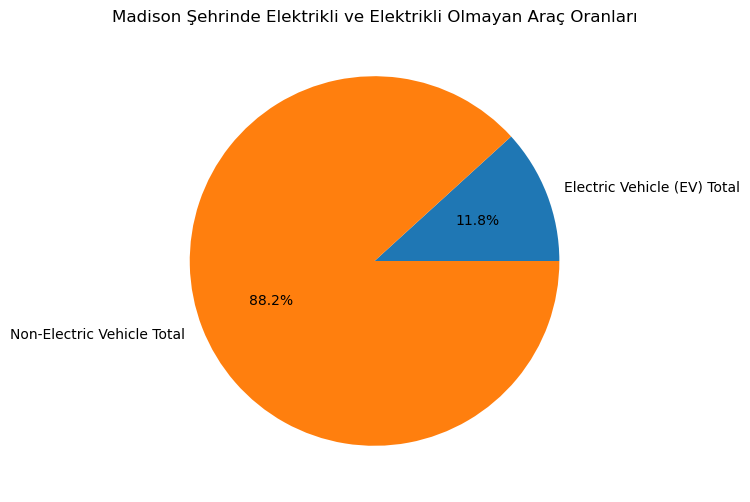

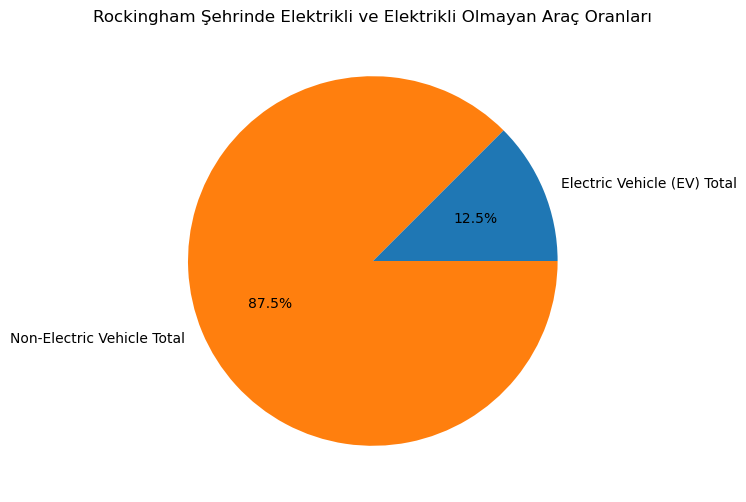

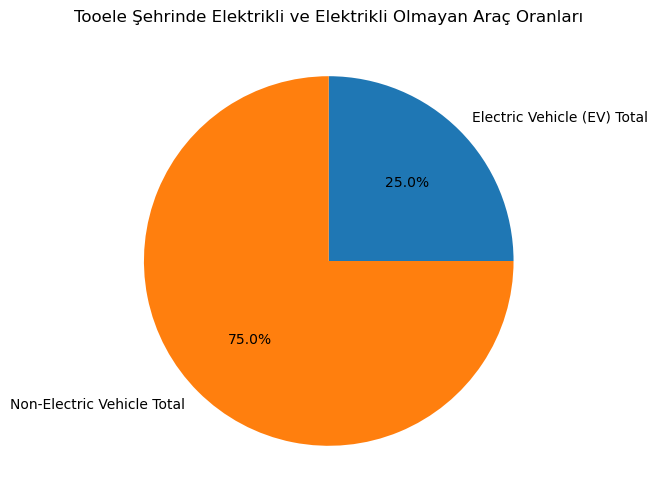

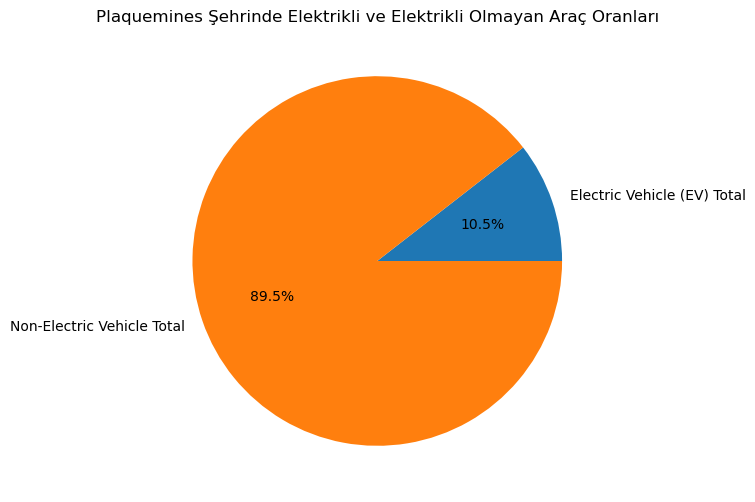

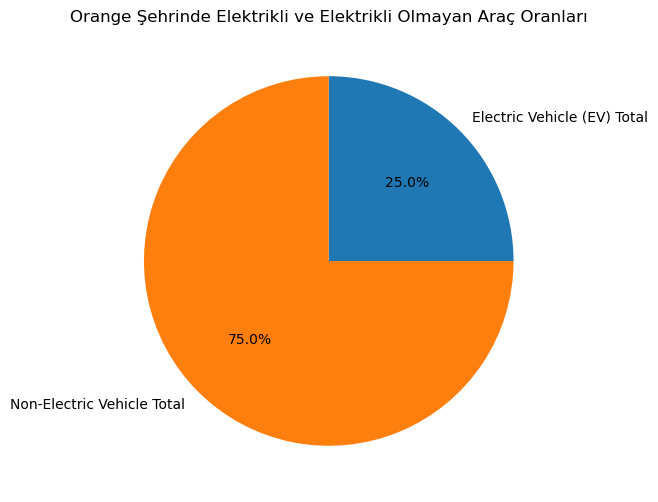

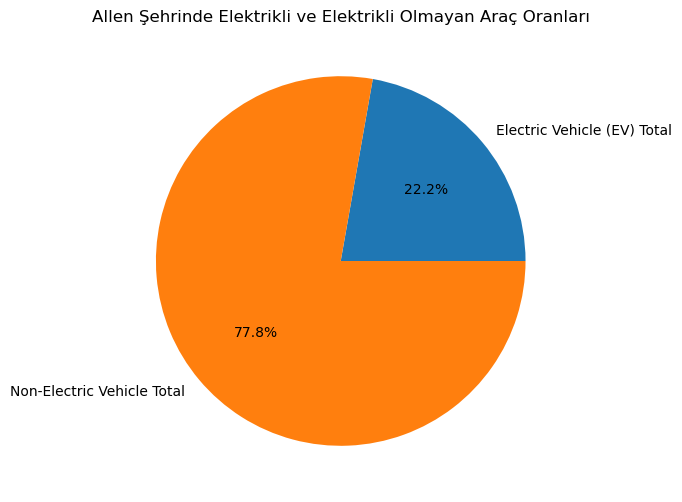

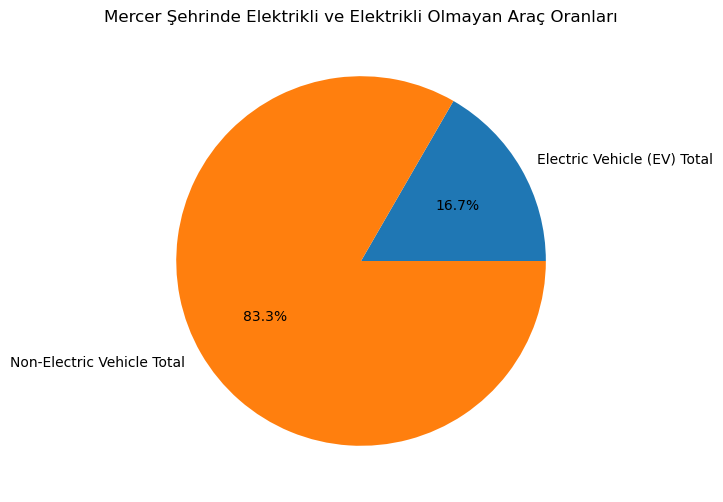

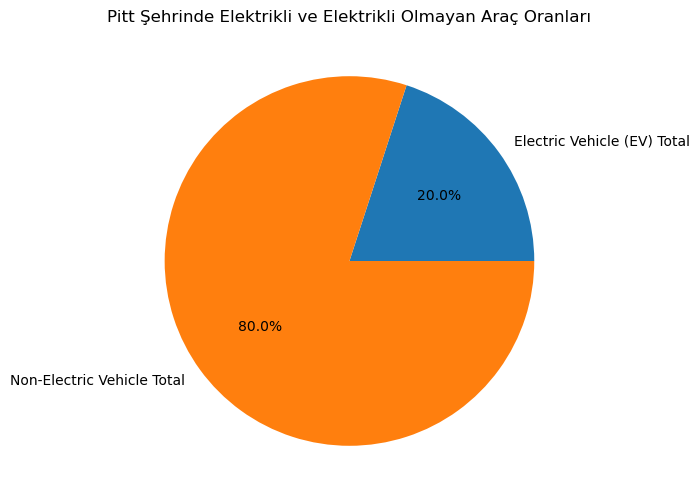

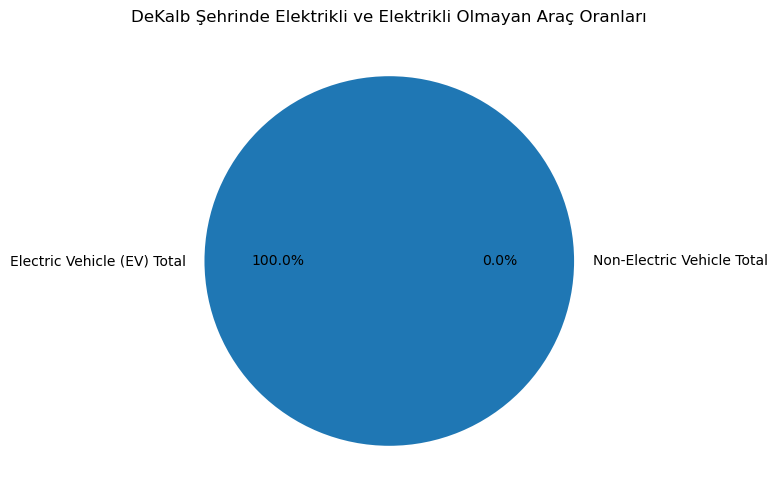

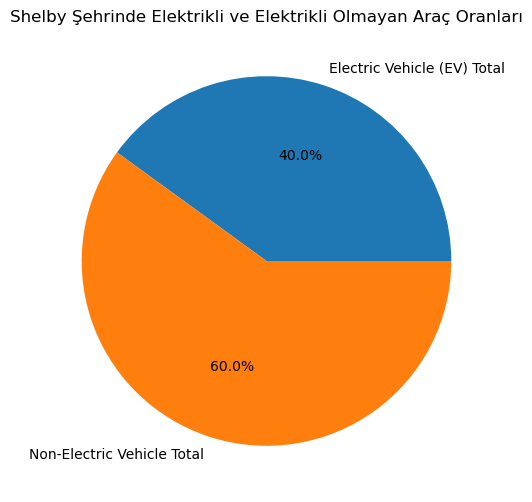

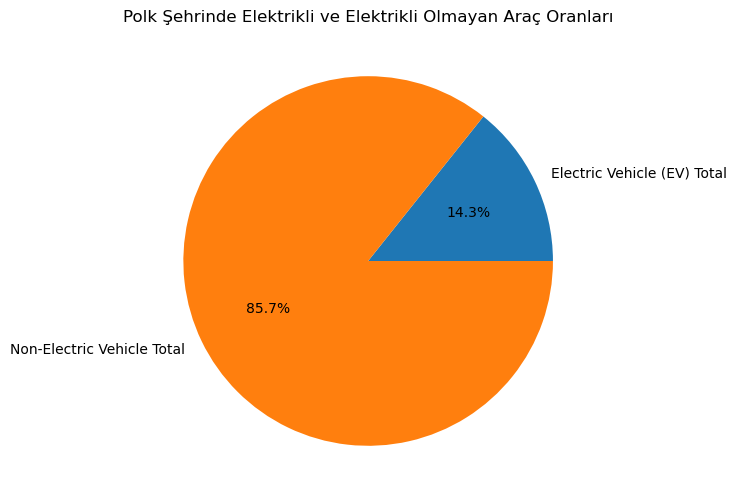

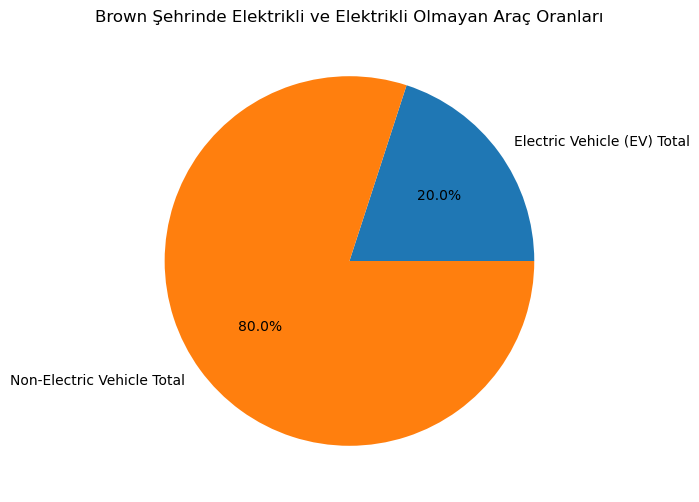

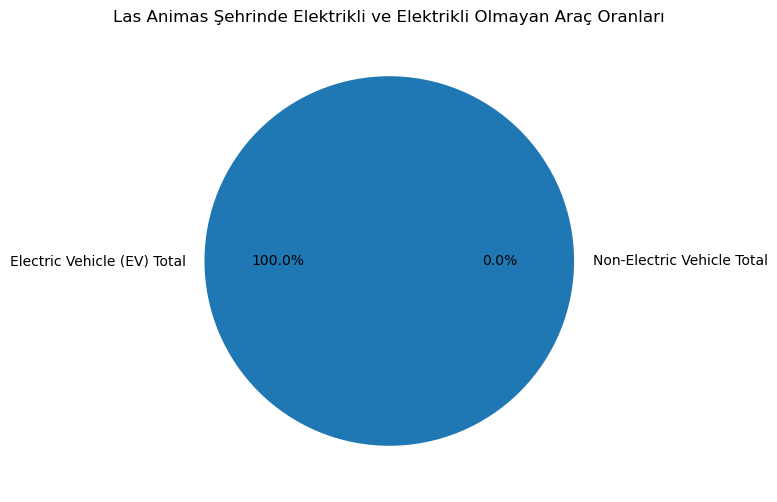

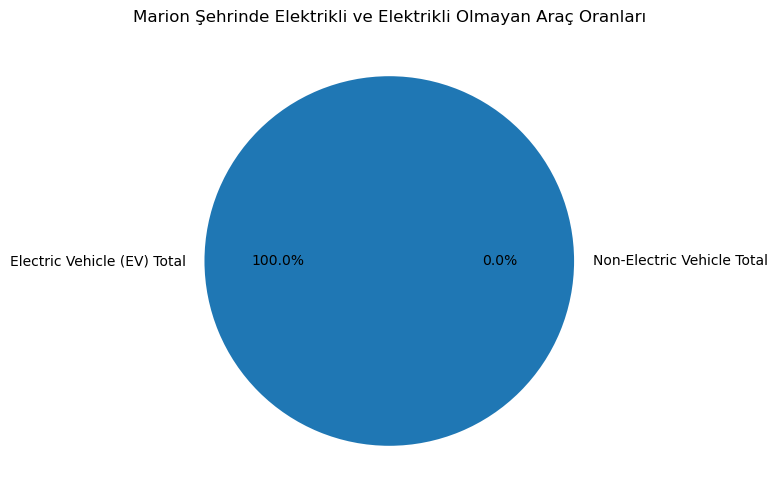

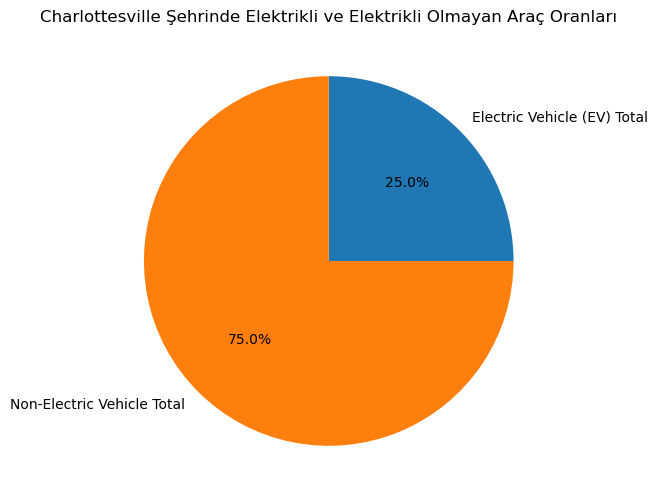

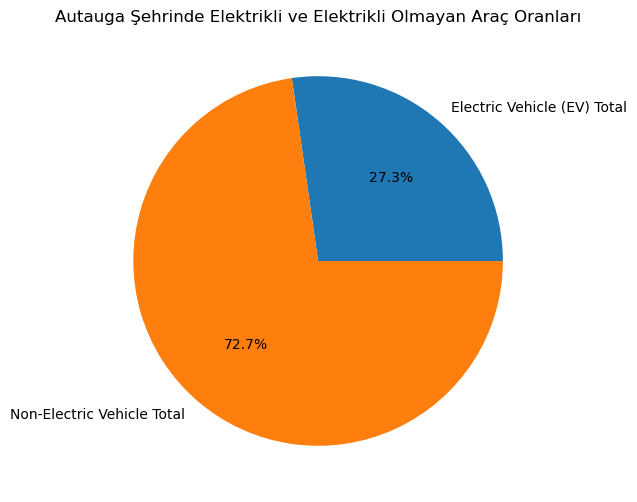

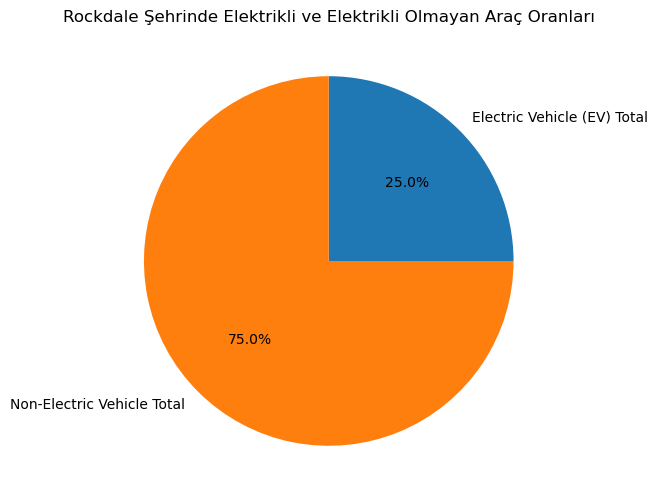

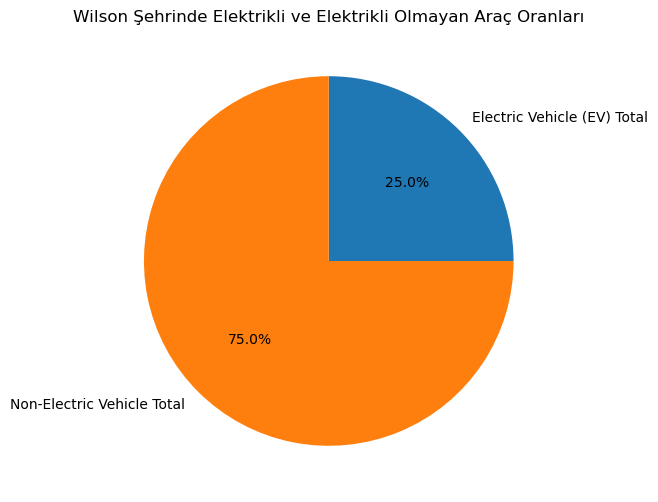

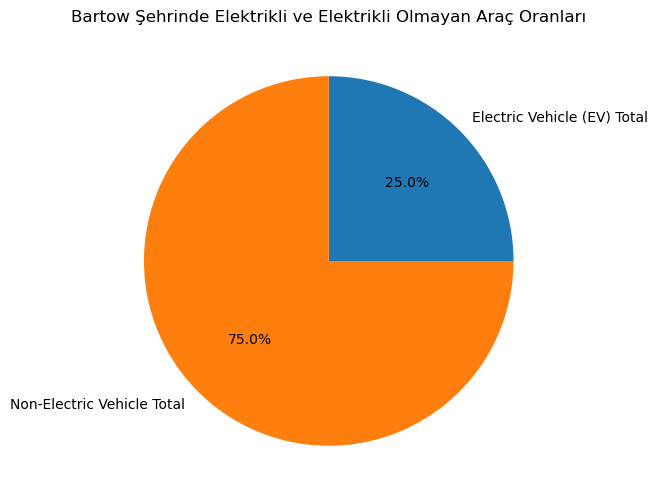

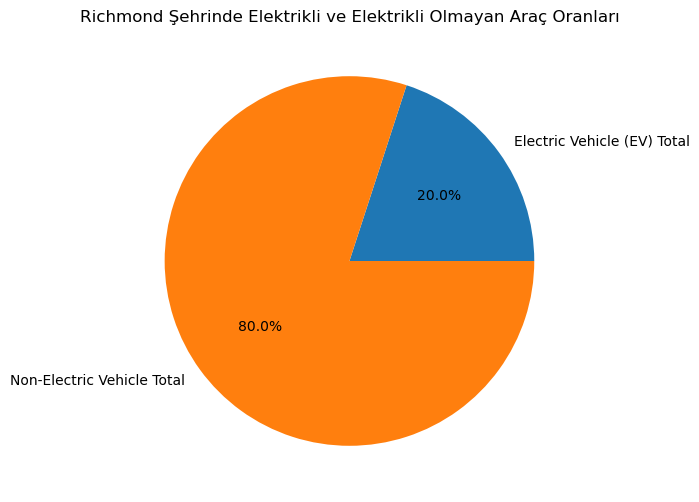

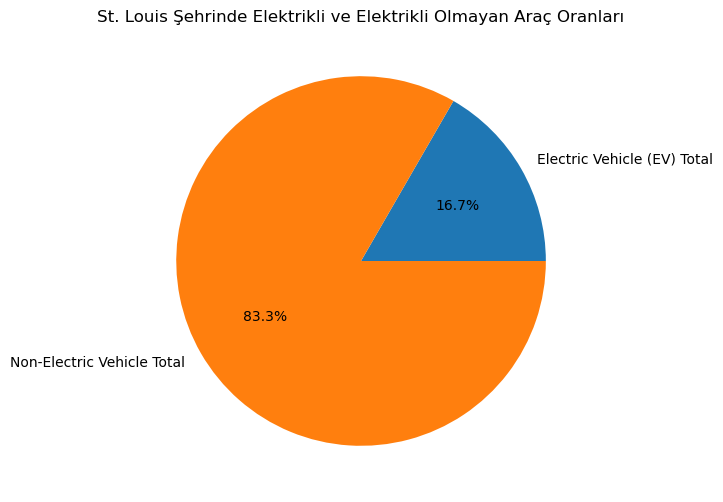

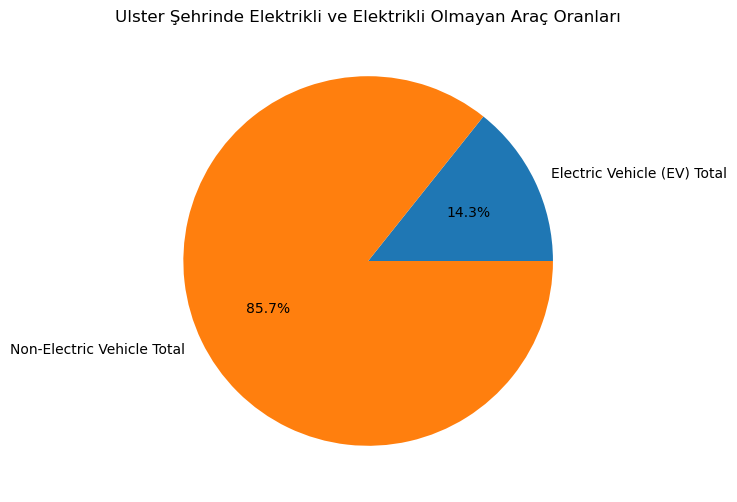

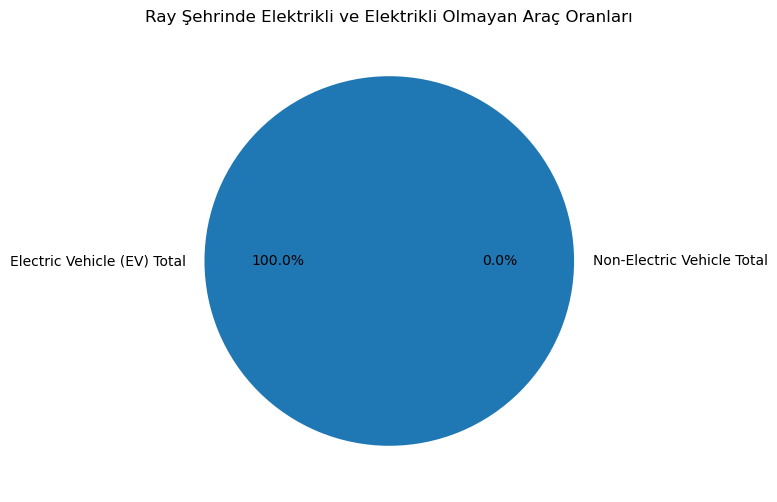

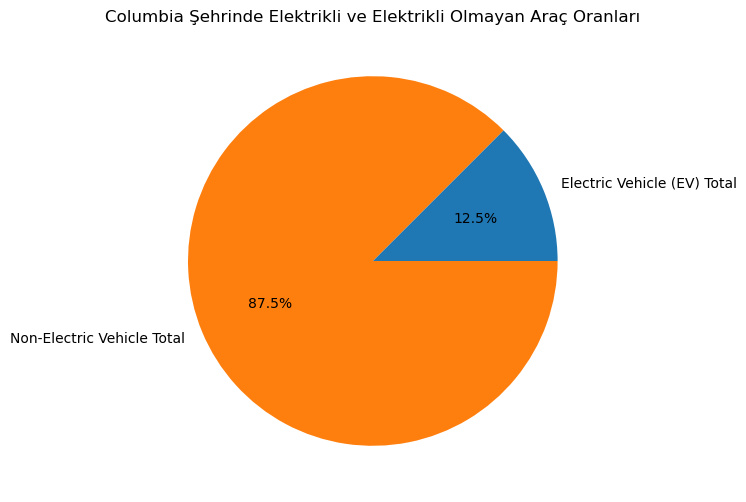

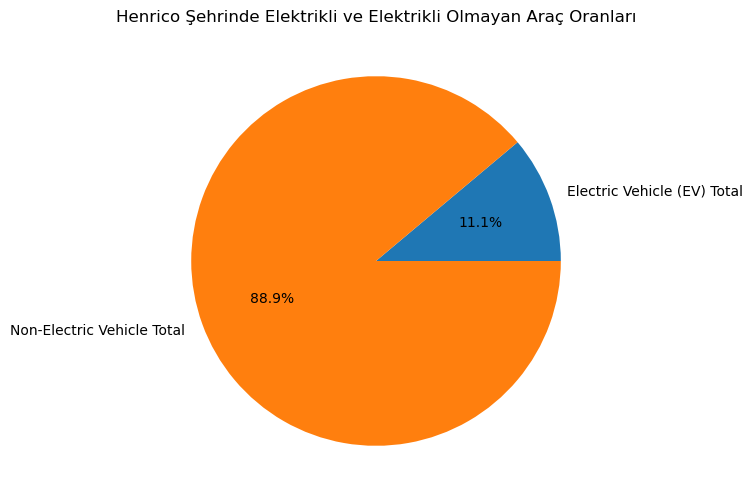

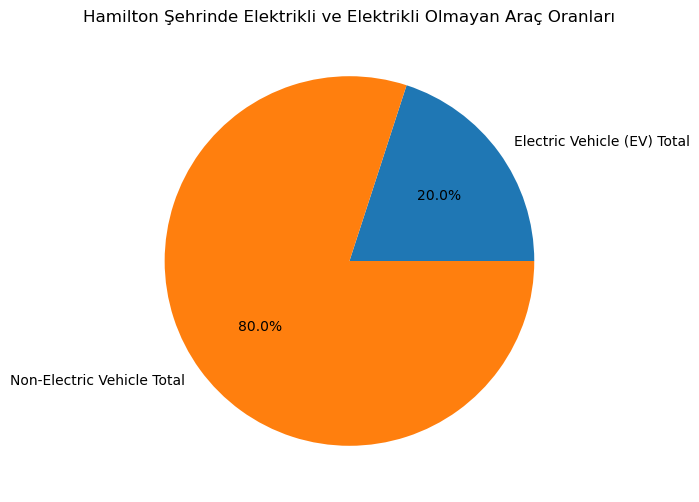

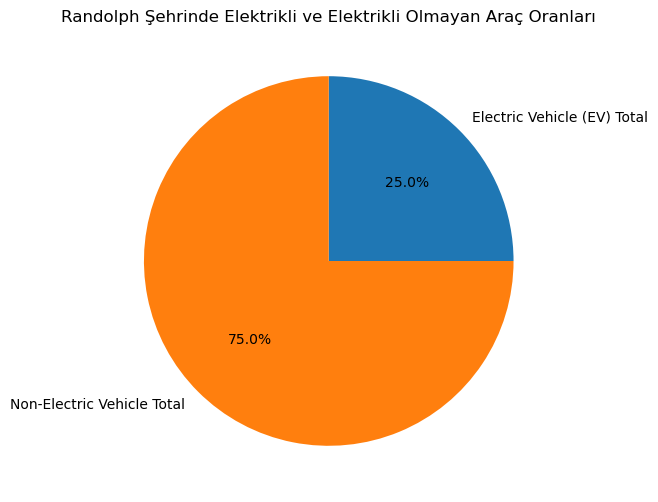

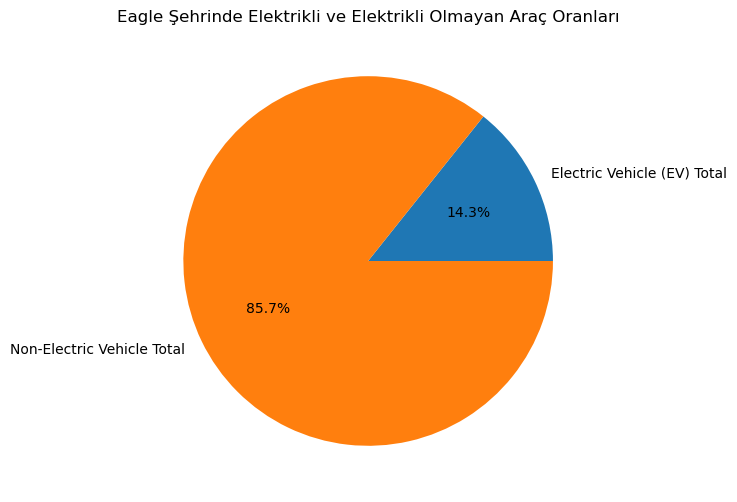

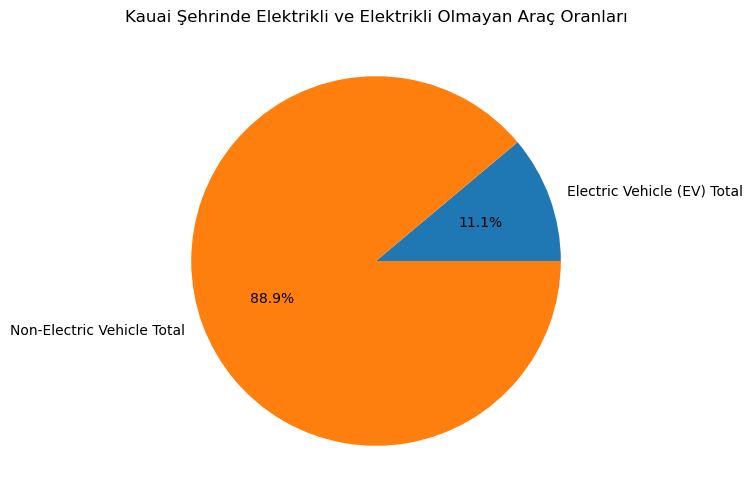

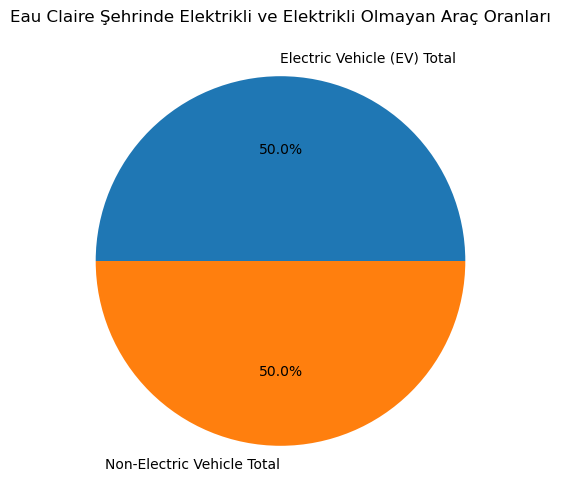

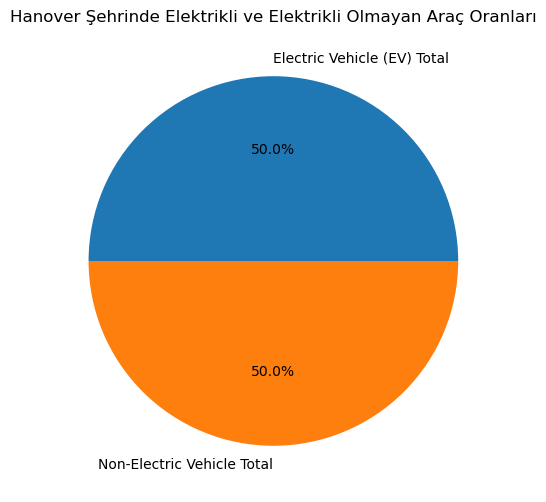

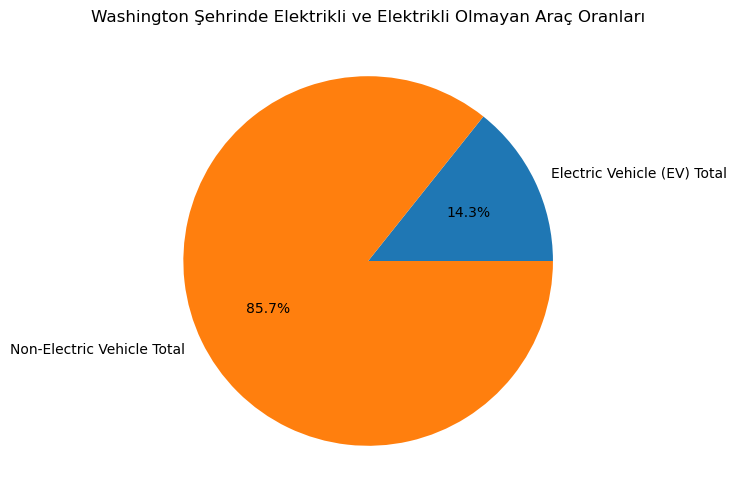

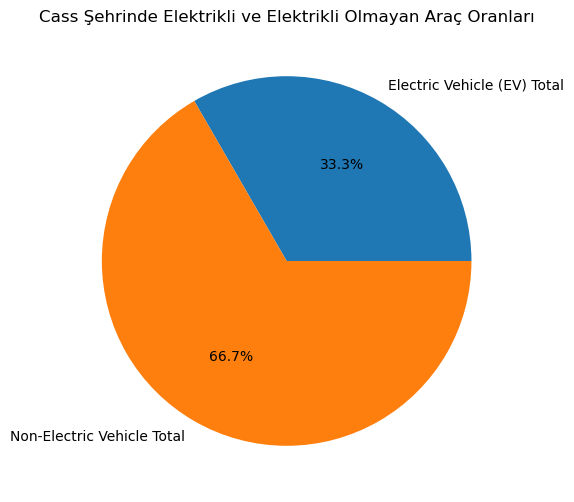

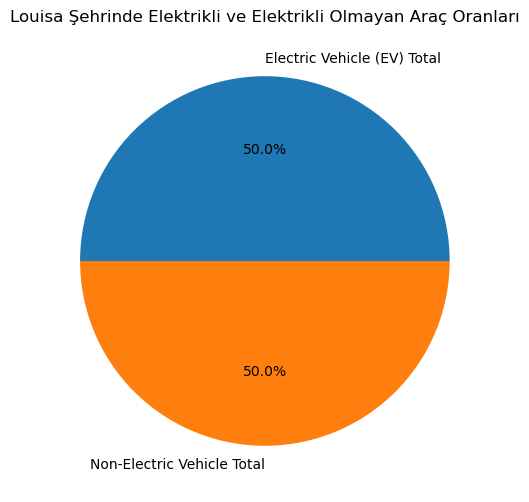

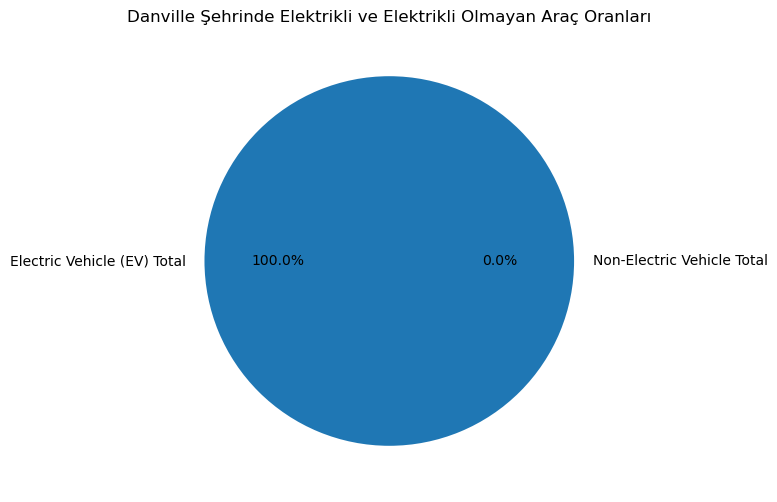

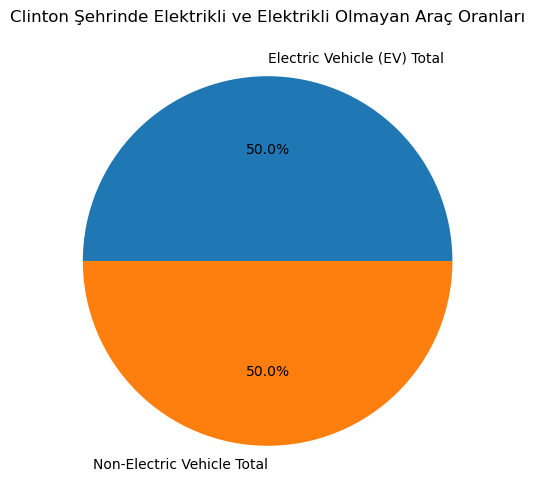

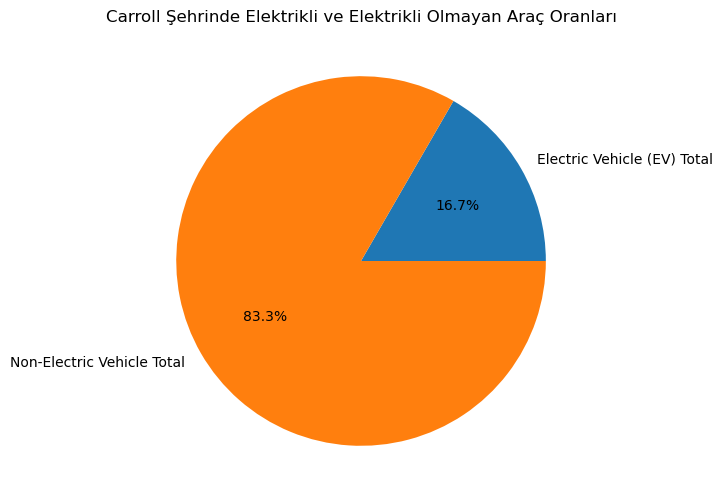

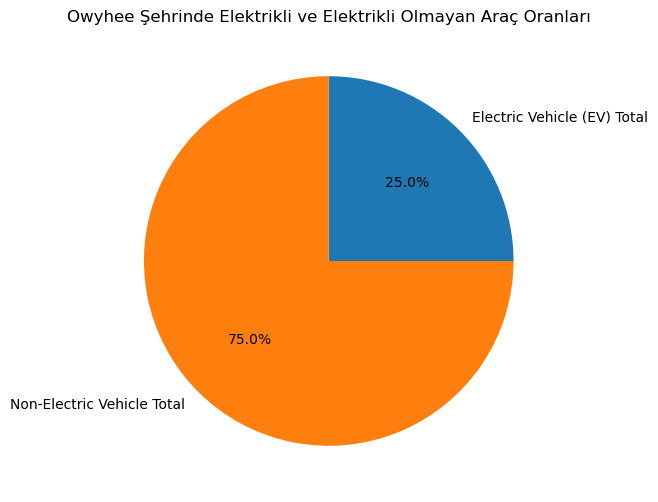

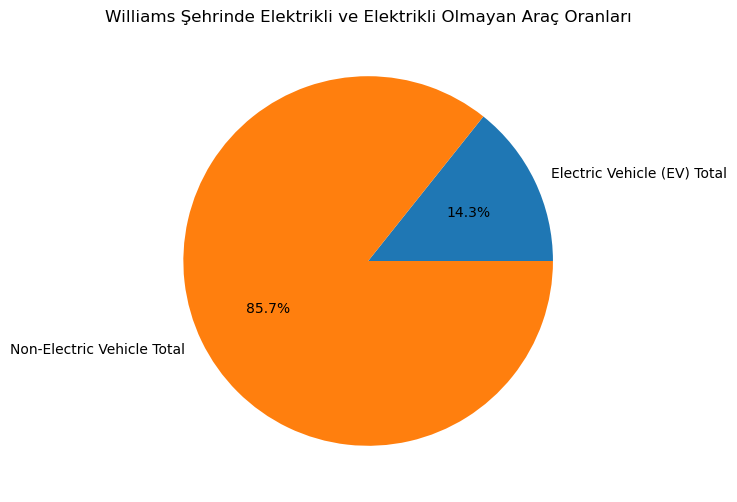

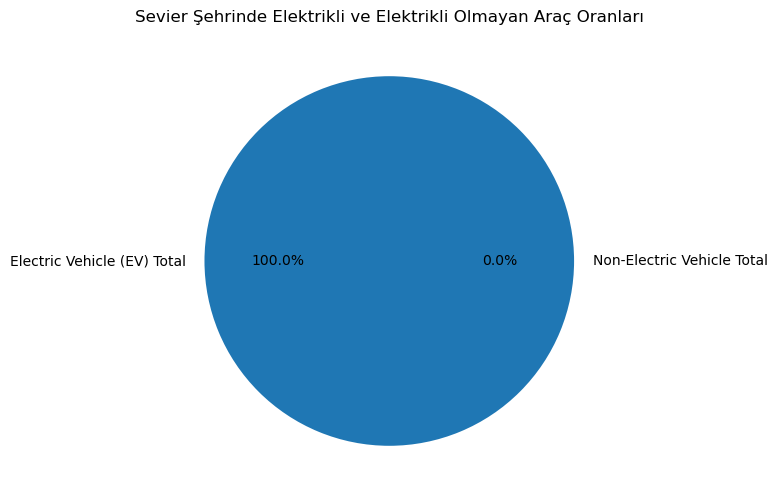

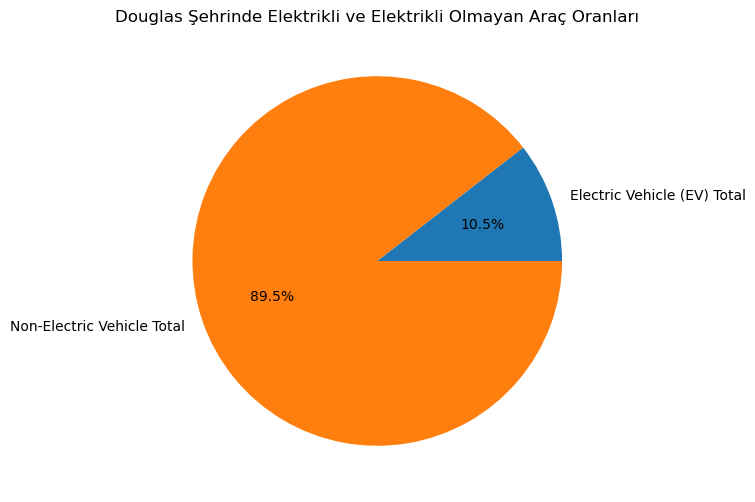

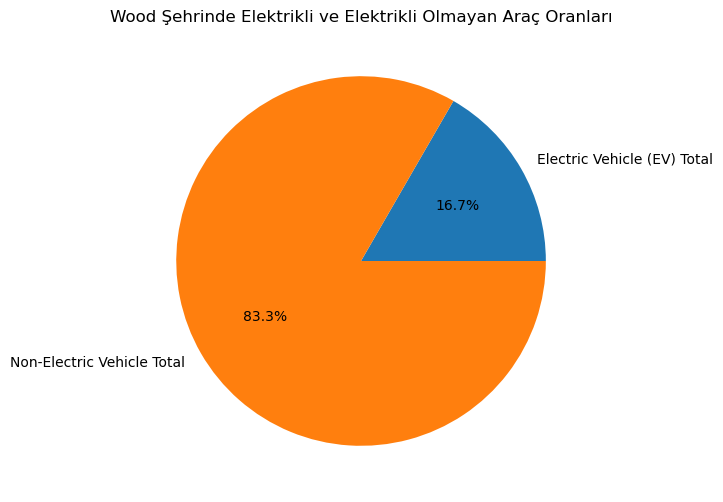

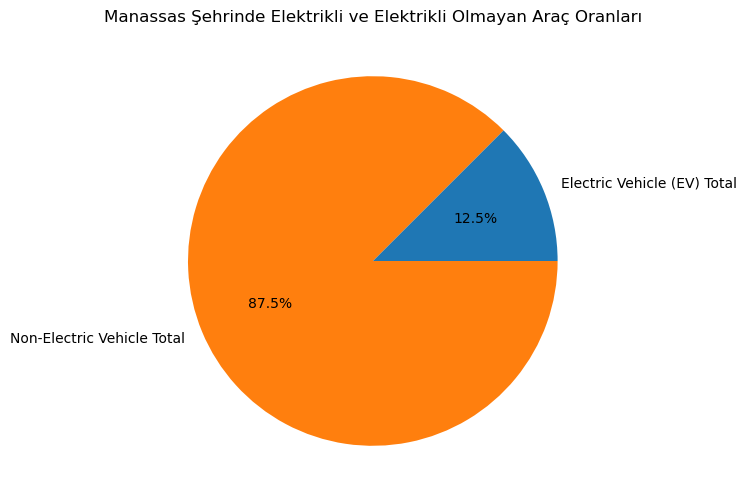

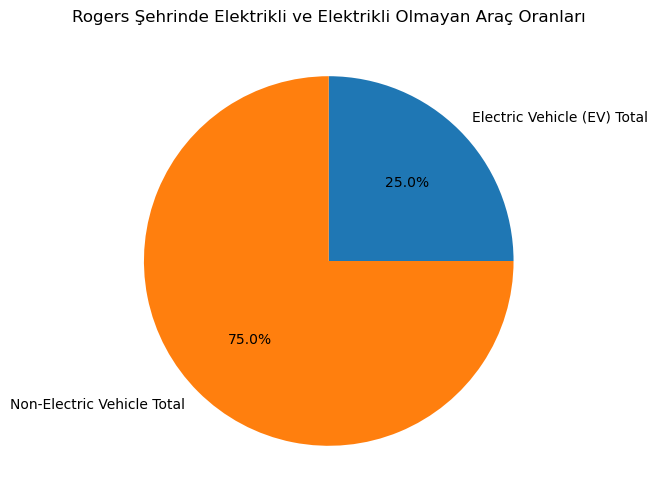

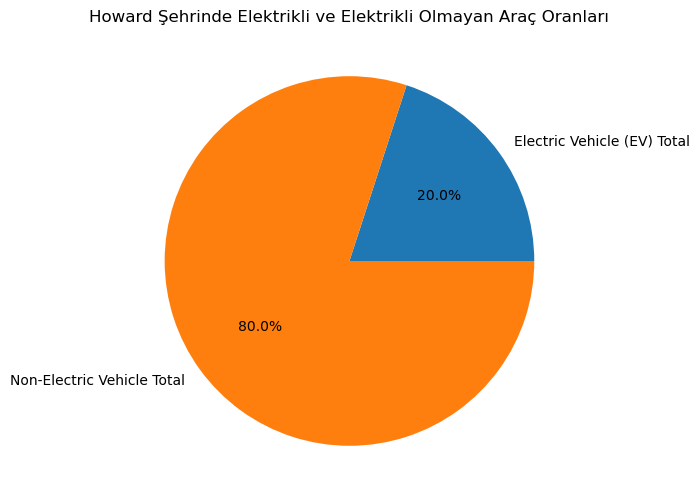

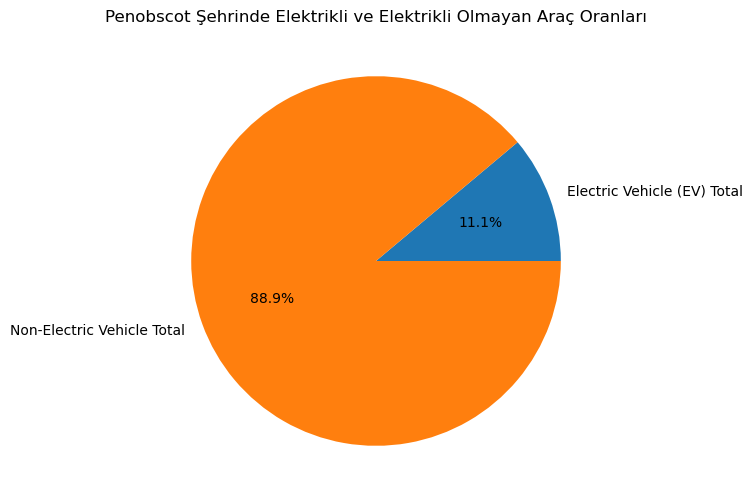

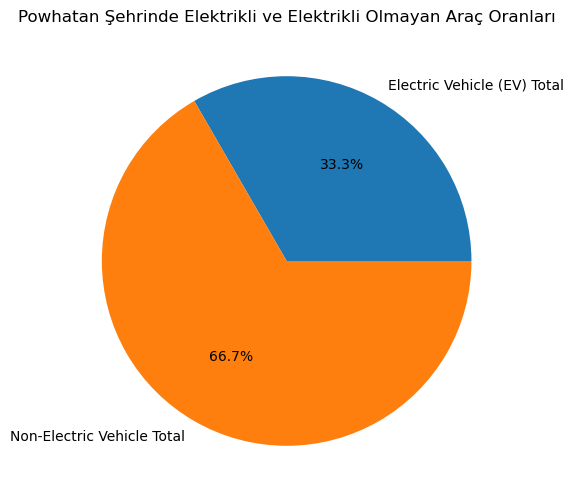

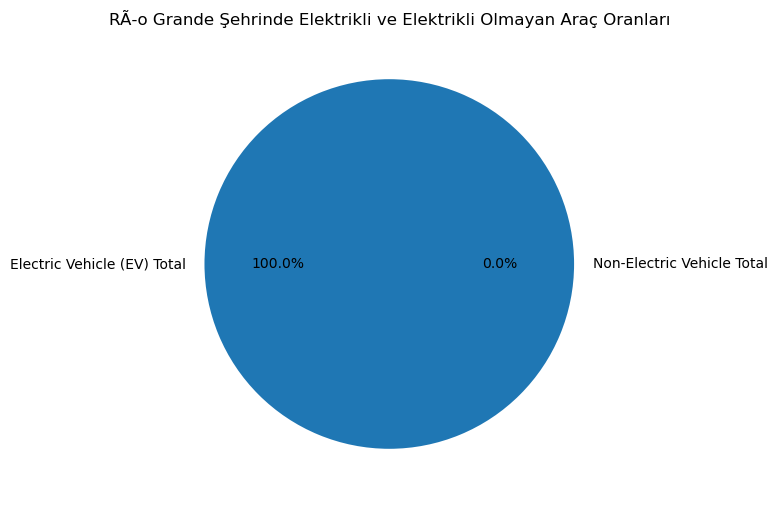

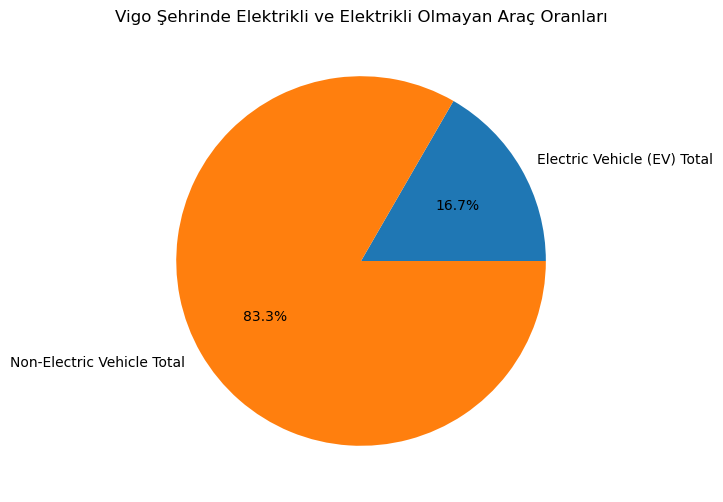

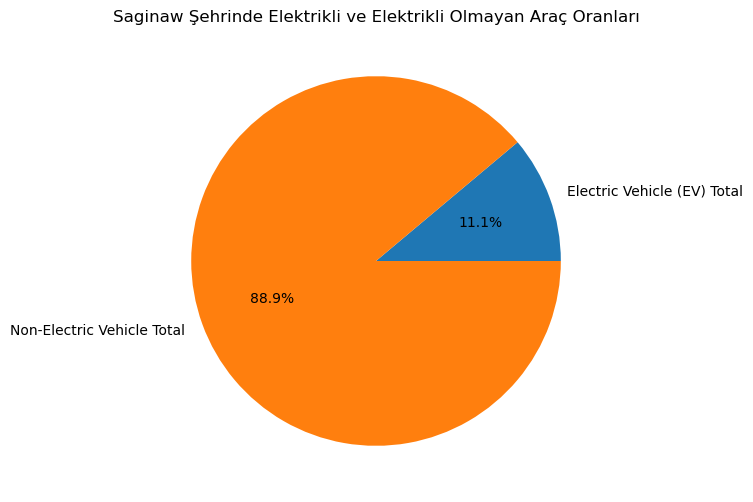

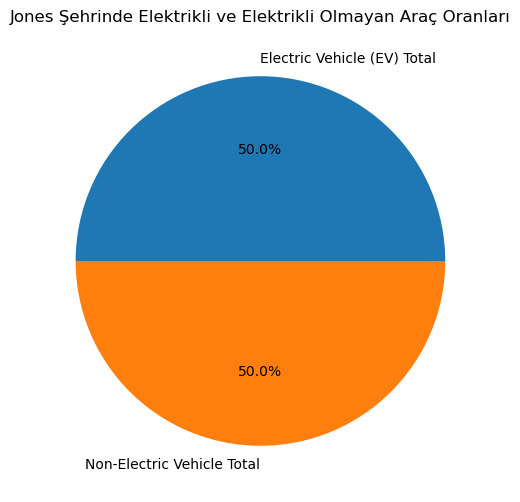

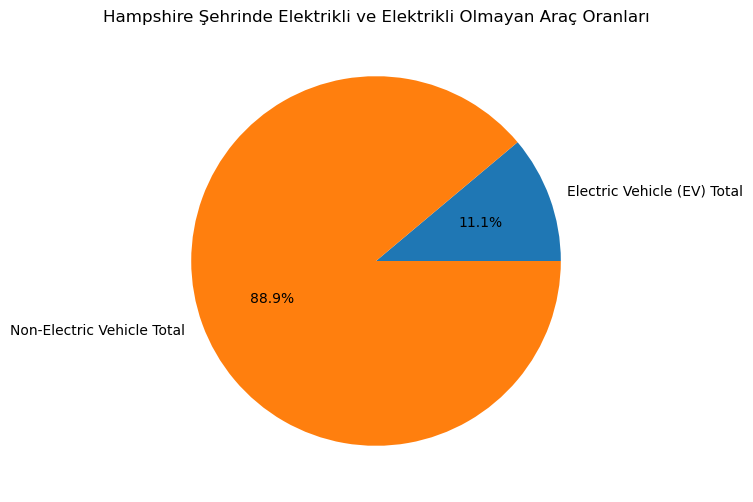

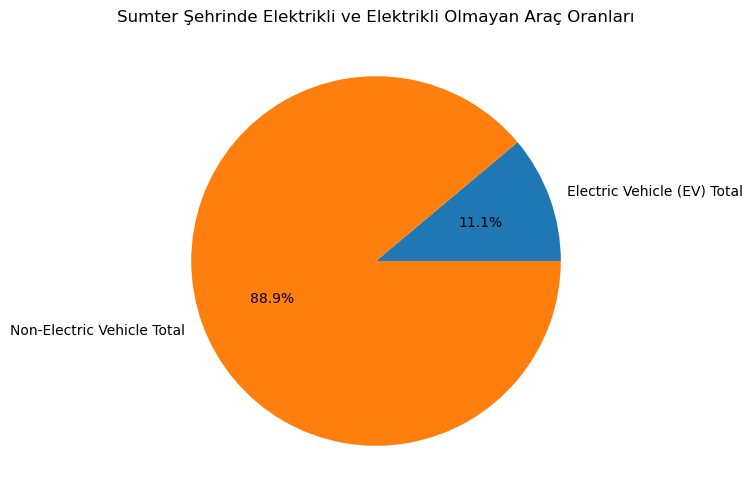

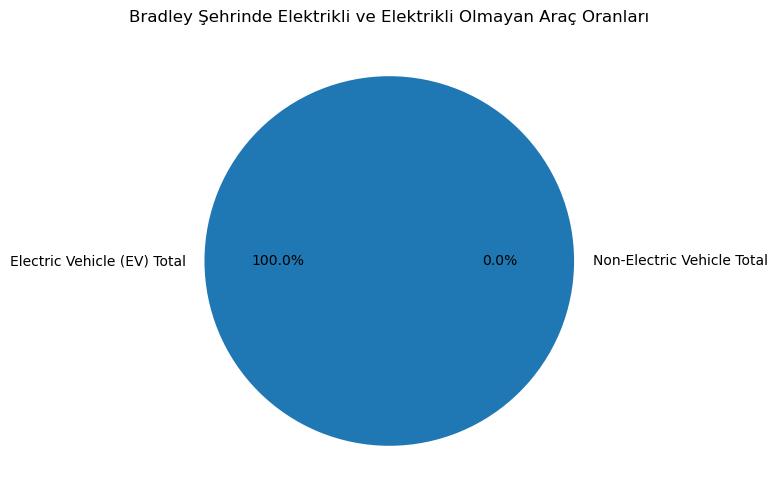

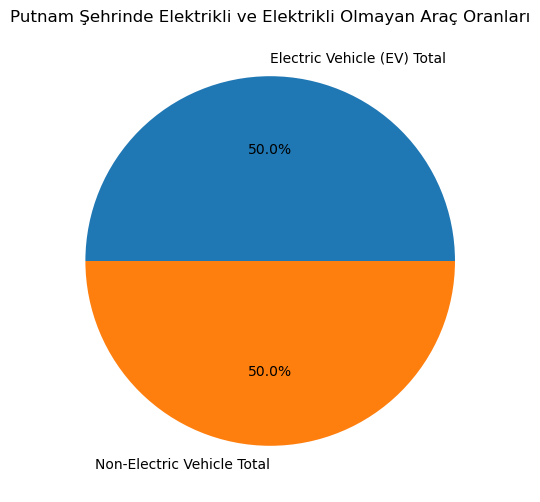

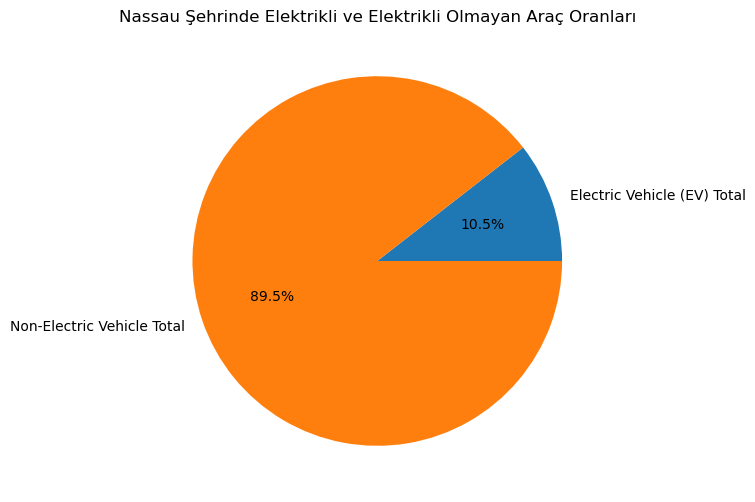

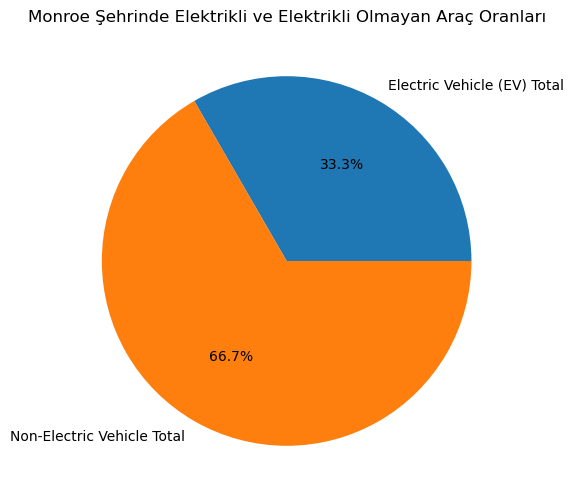

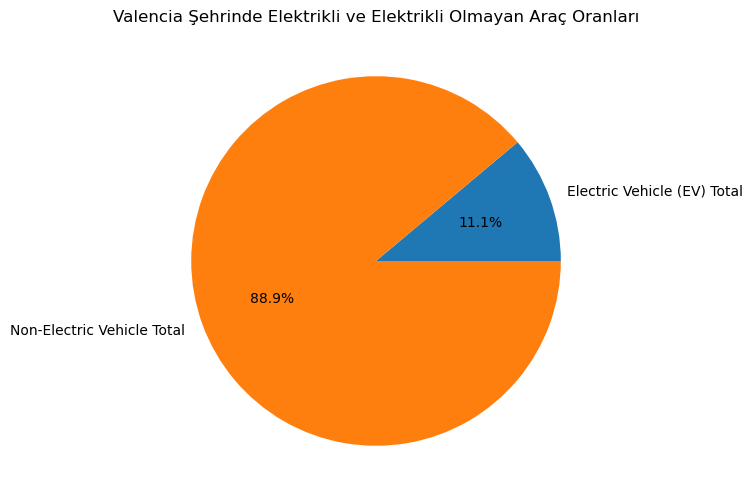

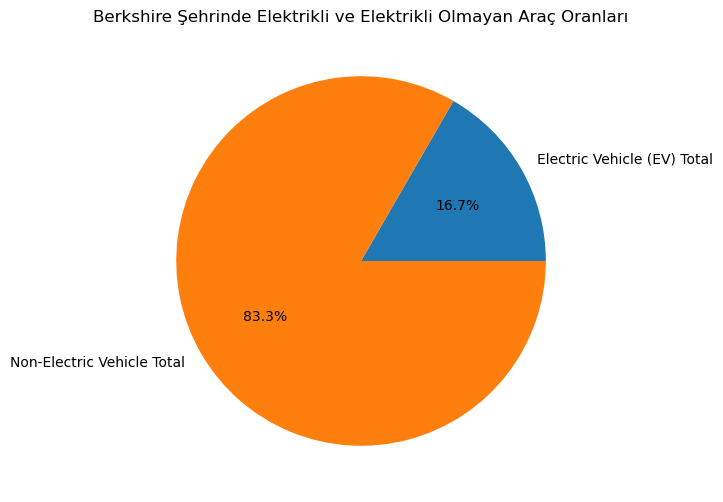

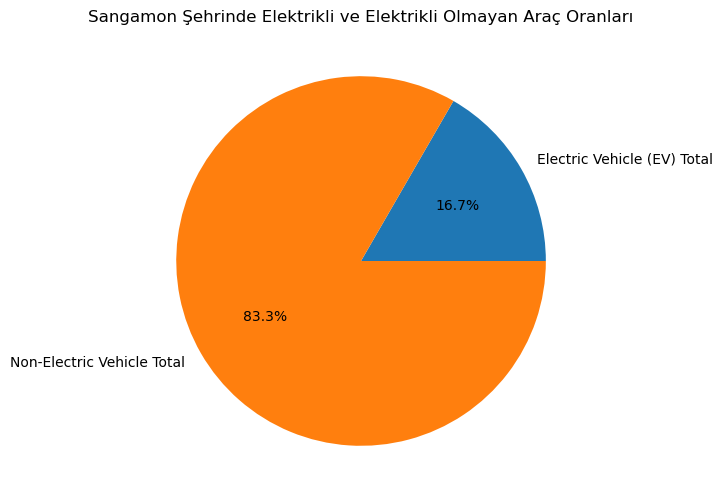

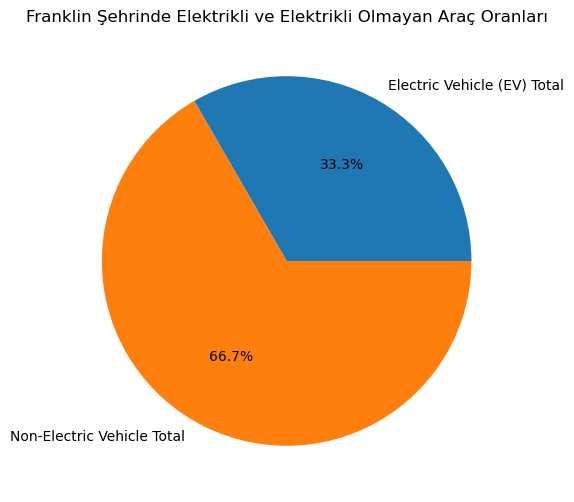

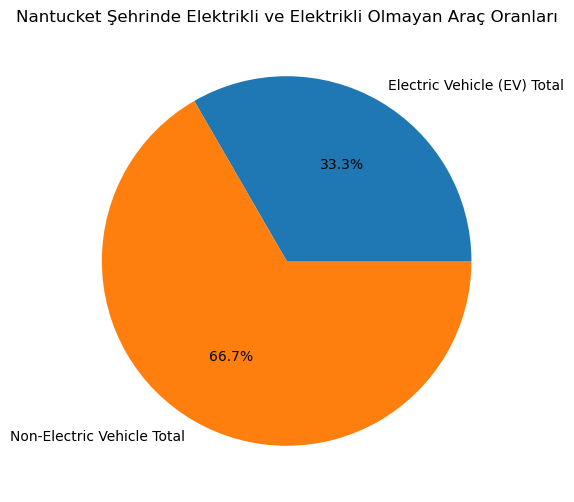

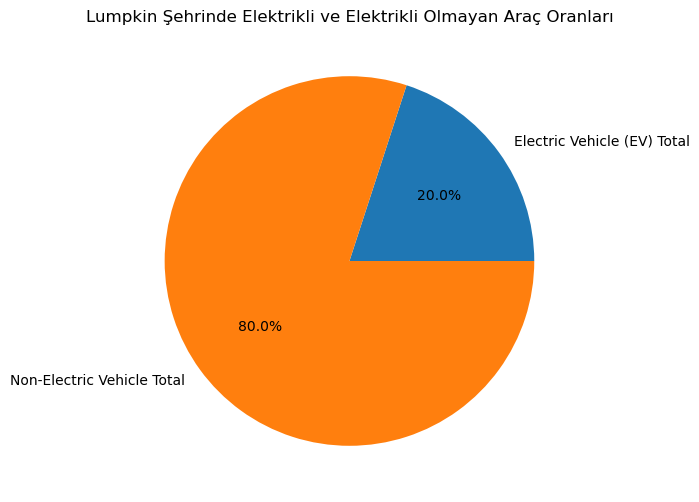

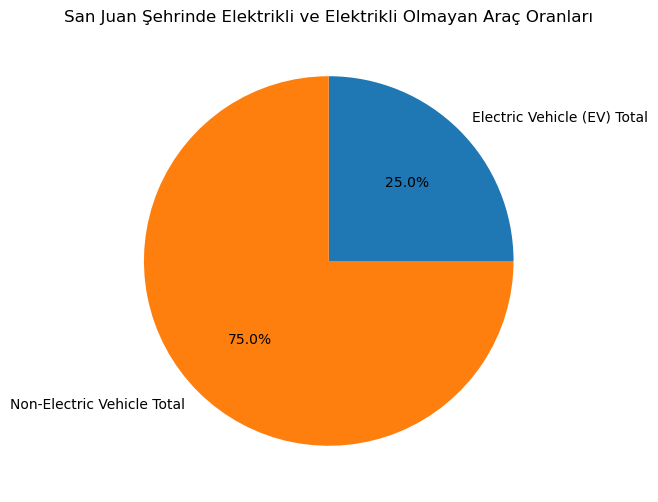

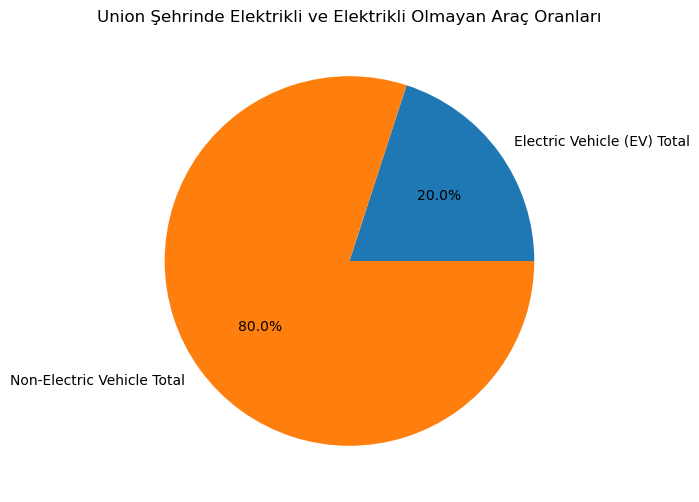

In [25]:

# Toplam araç sayısını ve oranları hesapla
df["Total Vehicles"] = df["Electric Vehicle (EV) Total"] + df["Non-Electric Vehicle Total"]
df["EV Kullanım Oranı"] = (df["Electric Vehicle (EV) Total"] / df["Total Vehicles"]) * 100
df["NON-EV Kullanım Oranı"] = (df["Non-Electric Vehicle Total"] / df["Total Vehicles"]) * 100

# Elektrikli araç oranı %10'dan fazla olan şehirleri filtrele
filtered_data = df[df["EV Kullanım Oranı"] > 10]

# Elektrikli araç oranı %10'dan fazla olan şehirlerin sayısını öğren
city_count = filtered_data["County"].nunique()
print(f"Elektrikli araç oranı %10'dan fazla olan şehir sayısı: {city_count}")


# Pasta grafiklerini şehir bazında oluşturun
for sehir in filtered_data["County"].unique():
    sehir_data = filtered_data[filtered_data["County"] == sehir]
    ev_total = sehir_data["Electric Vehicle (EV) Total"].values[0]  # İlk değeri al
    non_ev_total = sehir_data["Non-Electric Vehicle Total"].values[0]  # İlk değeri al
    plt.figure(figsize=(6, 6))
    plt.pie([ev_total, non_ev_total], labels=["Electric Vehicle (EV) Total", "Non-Electric Vehicle Total"], autopct="%1.1f%%")
    plt.title(f"{sehir} Şehrinde Elektrikli ve Elektrikli Olmayan Araç Oranları")
    plt.show()


Elektrikli araç oranı %100 olan şehir sayısı: 11


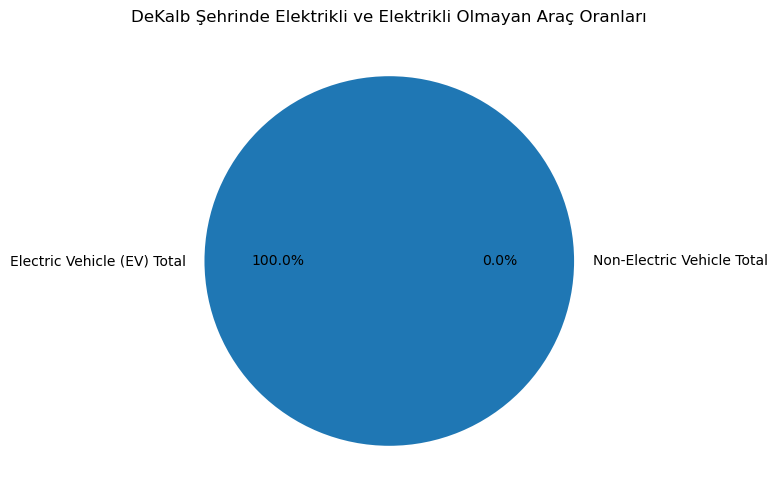

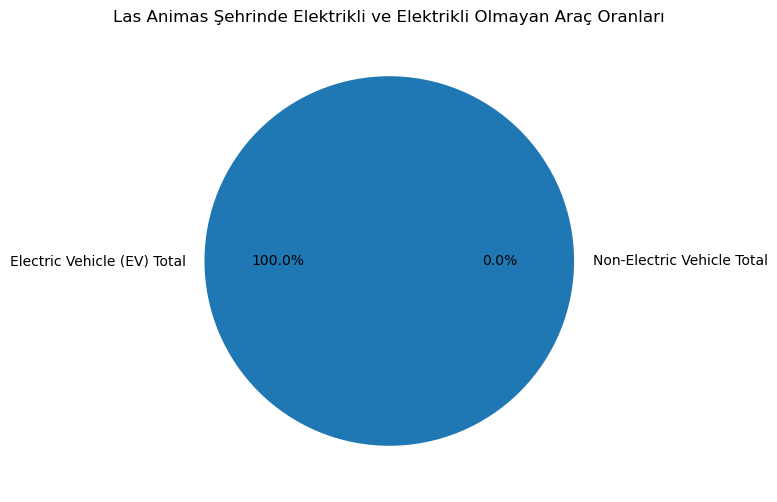

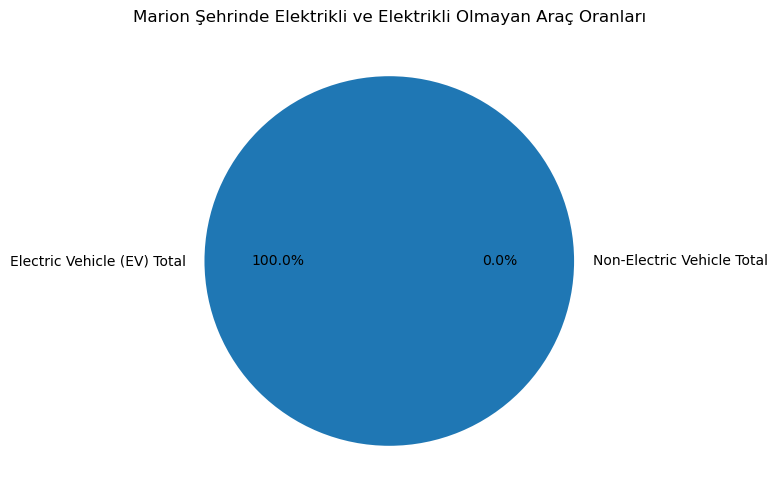

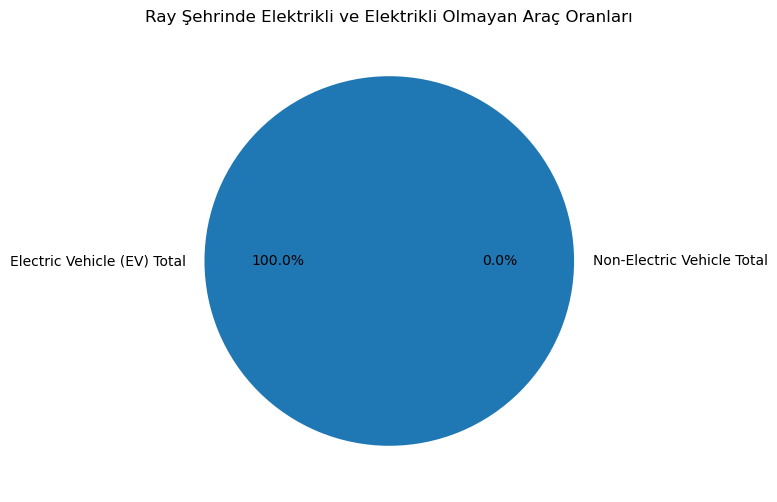

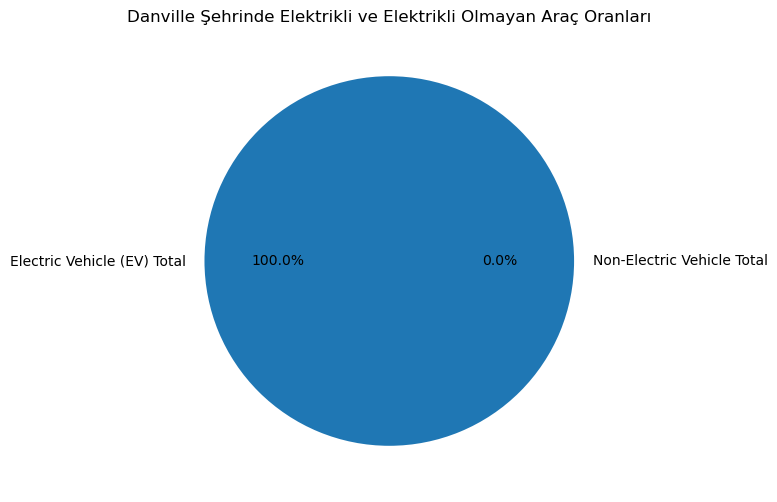

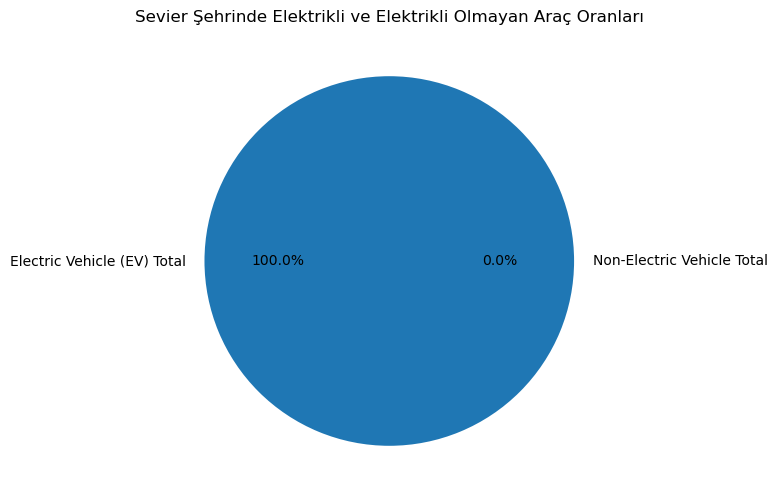

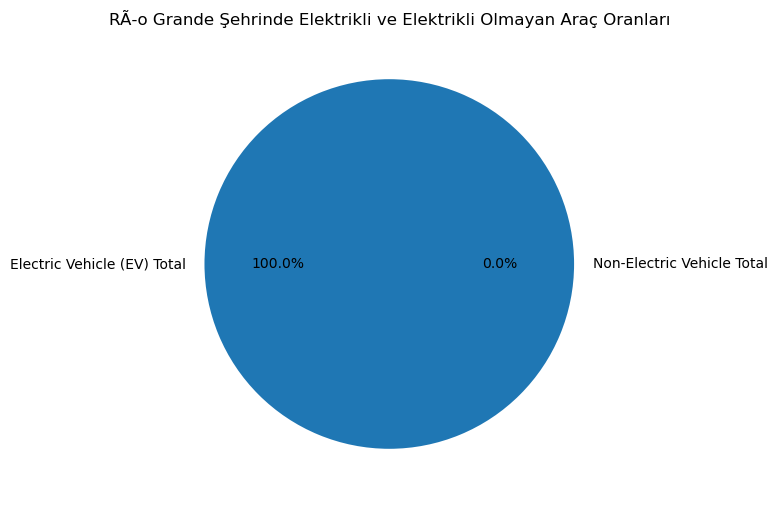

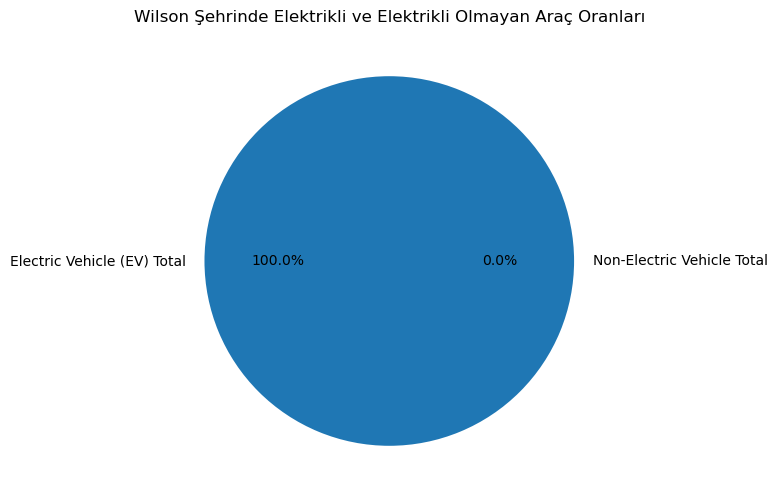

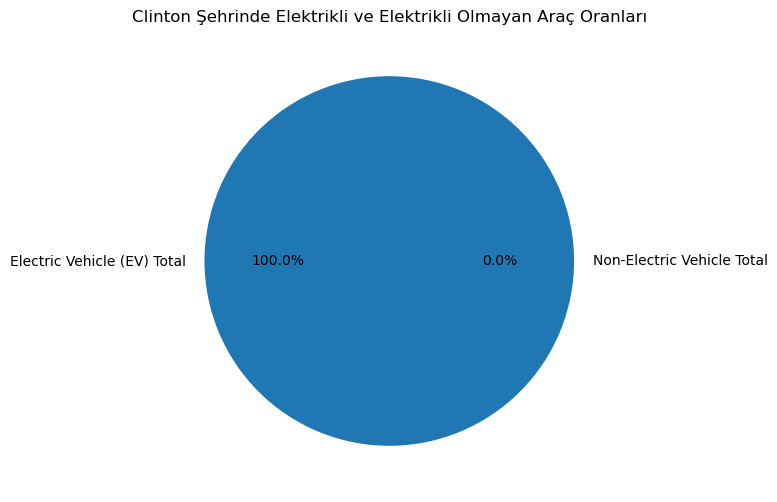

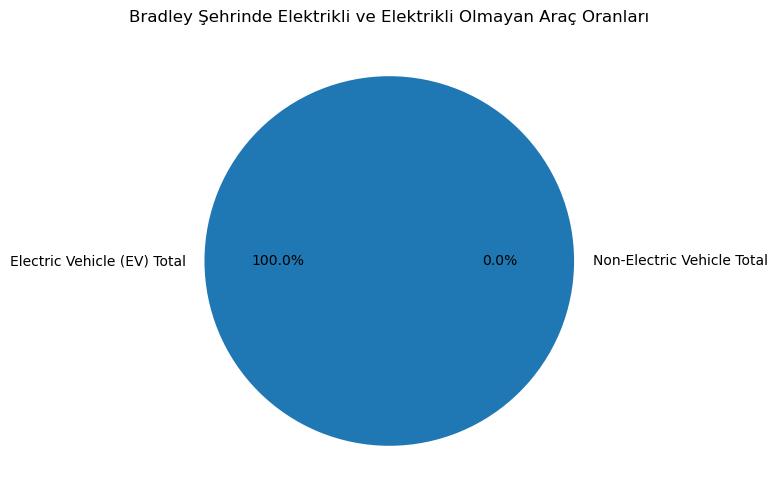

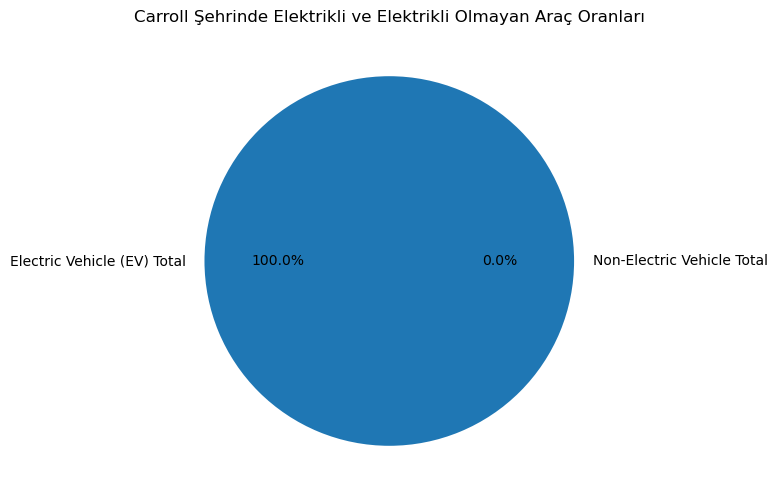

In [26]:

# Toplam araç sayısını ve oranları hesapla
df["Total Vehicles"] = df["Electric Vehicle (EV) Total"] + df["Non-Electric Vehicle Total"]
df["EV Kullanım Oranı"] = (df["Electric Vehicle (EV) Total"] / df["Total Vehicles"]) * 100
df["NON-EV Kullanım Oranı"] = (df["Non-Electric Vehicle Total"] / df["Total Vehicles"]) * 100

# Elektrikli araç oranı %10'dan fazla olan şehirleri filtrele
filtered_data = df[df["EV Kullanım Oranı"] > 99] 

# Elektrikli araç oranı %10'dan fazla olan şehirlerin sayısını öğren
city_count = filtered_data["County"].nunique()
print(f"Elektrikli araç oranı %100 olan şehir sayısı: {city_count}")


# Pasta grafiklerini şehir bazında oluşturun
for sehir in filtered_data["County"].unique():
    sehir_data = filtered_data[filtered_data["County"] == sehir]
    ev_total = sehir_data["Electric Vehicle (EV) Total"].values[0]  # İlk değeri al
    non_ev_total = sehir_data["Non-Electric Vehicle Total"].values[0]  # İlk değeri al
    plt.figure(figsize=(6, 6))
    plt.pie([ev_total, non_ev_total], labels=["Electric Vehicle (EV) Total", "Non-Electric Vehicle Total"], autopct="%1.1f%%")
    plt.title(f"{sehir} Şehrinde Elektrikli ve Elektrikli Olmayan Araç Oranları")
    plt.show()


Carroll, Bradley, DeKalb, Sevier, Clinton Danville, Wilson, Las Animas, Marion,Ray, RA-o Grande

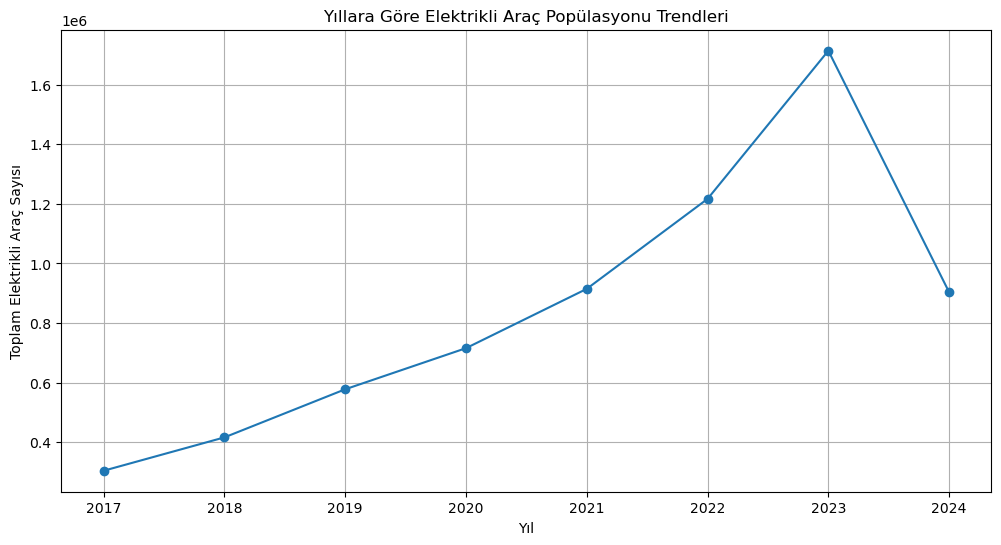

In [36]:
# Genel trendleri analiz edelim
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_trend = df.groupby('Year')['Electric Vehicle (EV) Total'].sum()

plt.figure(figsize=(12, 6))
yearly_trend.plot(kind='line', marker='o')
plt.title('Yıllara Göre Elektrikli Araç Popülasyonu Trendleri')
plt.xlabel('Yıl')
plt.ylabel('Toplam Elektrikli Araç Sayısı')
plt.grid(True)
plt.show()


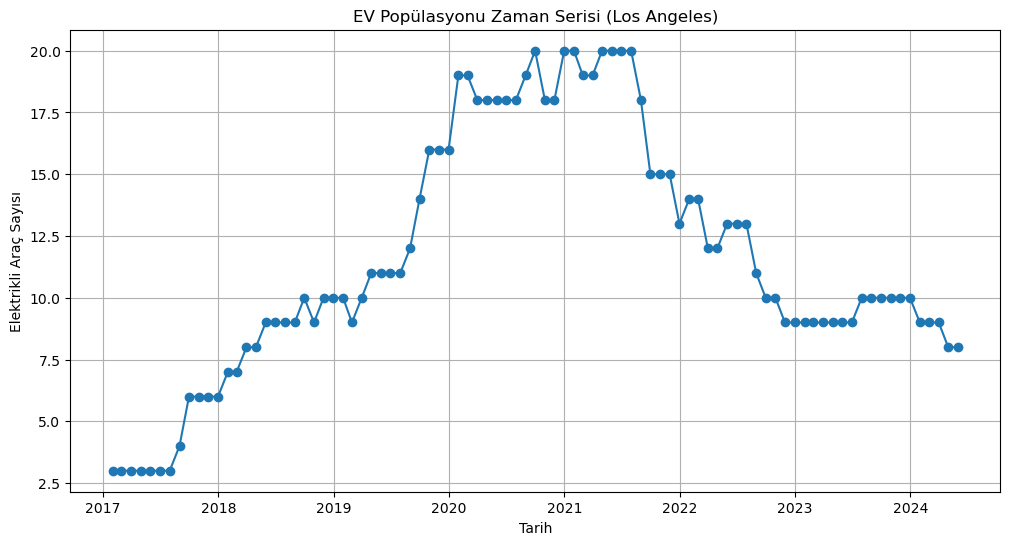

In [38]:
# Zaman serisi analizi için veri setini zaman sütununa göre sıralayalım
df['Date'] = pd.to_datetime(df['Date'])  # Date sütununu datetime formatına dönüştür
df = df.sort_values('Date')

# Belirli bir bölge için zaman serisi grafiği çizelim
import matplotlib.pyplot as plt

county_name = 'Los Angeles'  # Analiz yapmak istediğiniz ilçe adı
county_data = df[df['County'] == county_name]

plt.figure(figsize=(12, 6))
plt.plot(county_data['Date'], county_data['Electric Vehicle (EV) Total'], marker='o')
plt.title(f'EV Popülasyonu Zaman Serisi ({county_name})')
plt.xlabel('Tarih')
plt.ylabel('Elektrikli Araç Sayısı')
plt.grid(True)
plt.show()

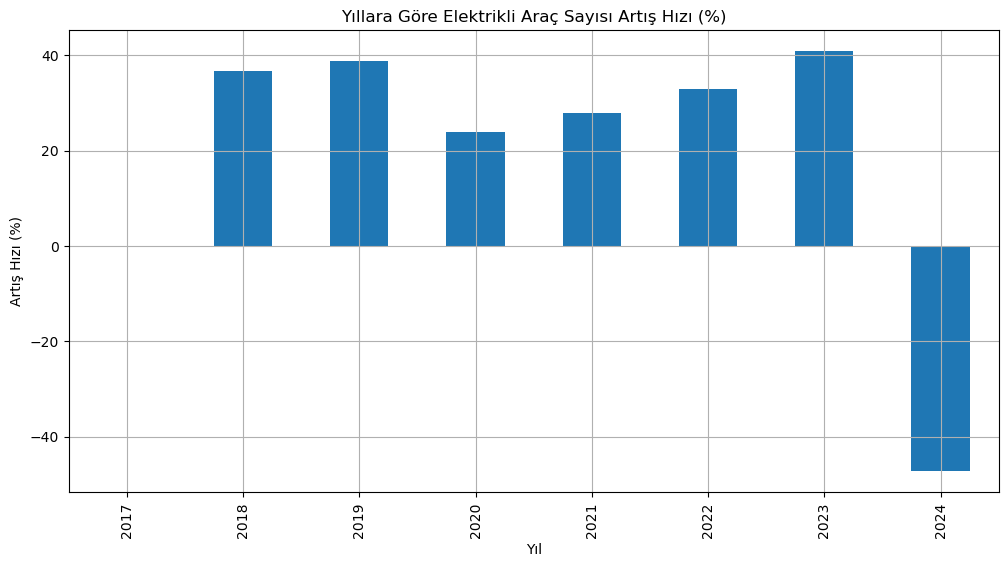

In [40]:
# Yıllara göre elektrikli araç sayısı artış hızını analiz edelim
df['Year'] = df['Date'].dt.year
yearly_growth = df.groupby('Year')['Electric Vehicle (EV) Total'].sum().pct_change() * 100

plt.figure(figsize=(12, 6))
yearly_growth.plot(kind='bar')
plt.title('Yıllara Göre Elektrikli Araç Sayısı Artış Hızı (%)')
plt.xlabel('Yıl')
plt.ylabel('Artış Hızı (%)')
plt.grid(True)
plt.show()

avrupada da durum bu sekide imis https://tr.euronews.com/business/2024/04/19/avrupada-otomobil-satislari-dusuyor-elektrikli-araclarin-gelecegi-tehlikede-mi#:~:text=Avrupa%20Otomobil%20%C3%9Creticileri%20Birli%C4%9Fi%20(ACEA,sat%C4%B1%C5%9Flar%C4%B1%20da%20ayn%C4%B1%20d%C3%B6nemde%20geriledi.  genel olarak batarya omru ve sarj istasyonlarinin azligi sebep gosterilmis. benim buldugum veri 2024-05-31  ve   2017-01-31  arsinda alinan veriler 

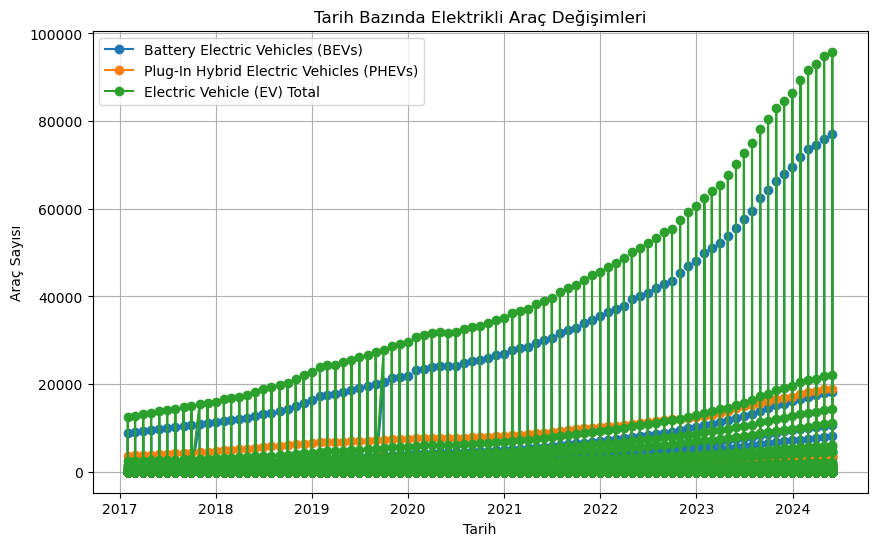

In [43]:
#Tarih Bazında Elektrikli Araç Değişimleri

df['Date'] = pd.to_datetime(df['Date'])  # Tarih sütununu datetime formatına çevirme

# Çizgi grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Battery Electric Vehicles (BEVs)'], label='Battery Electric Vehicles (BEVs)', marker='o')
plt.plot(df['Date'], df['Plug-In Hybrid Electric Vehicles (PHEVs)'], label='Plug-In Hybrid Electric Vehicles (PHEVs)', marker='o')
plt.plot(df['Date'], df['Electric Vehicle (EV) Total'], label='Electric Vehicle (EV) Total', marker='o')

# Grafik başlıkları ve etiketleri
plt.title('Tarih Bazında Elektrikli Araç Değişimleri')
plt.xlabel('Tarih')
plt.ylabel('Araç Sayısı')
plt.legend()

# Grafiği gösterme
plt.grid(True)
plt.show()

                 MACHINE  LEARNING  

1 IMPORT DATA 
2 CLEAN DATA 
3 SPLIT THE DATA INTO TRAINING/TEST SETS 
4 CREATE MODEL 
5 TRAIN MODEL 
6 MAKE PREDICTIONS 
7 EVALUATE AND IMPROVE

Gelecekteki tarihler için elektrikli araç sayısını tahmin etme.

input set ---> tarin ve country output set ---> elektrikli arac sayisi

In [51]:
import pandas as pd

# Veri setinizi yükleyin.
df = pd.read_csv('C:/Users/gzman/Downloads/Electric_Vehicle_Population_Size_History_By_County.csv')

In [53]:
df.dtypes

Date                                         object
County                                       object
State                                        object
Vehicle Primary Use                          object
Battery Electric Vehicles (BEVs)              int64
Plug-In Hybrid Electric Vehicles (PHEVs)      int64
Electric Vehicle (EV) Total                   int64
Non-Electric Vehicle Total                    int64
Total Vehicles                                int64
Percent Electric Vehicles                   float64
dtype: object

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
df.dtypes

Date                                        datetime64[ns]
County                                              object
State                                               object
Vehicle Primary Use                                 object
Battery Electric Vehicles (BEVs)                     int64
Plug-In Hybrid Electric Vehicles (PHEVs)             int64
Electric Vehicle (EV) Total                          int64
Non-Electric Vehicle Total                           int64
Total Vehicles                                       int64
Percent Electric Vehicles                          float64
dtype: object

In [59]:
df = pd.DataFrame(df)

# Tarih sütununu datetime türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Ay ve Yıl sütunlarını oluşturma
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Orijinal tarih sütununu silme
df.drop(columns=['Date'], inplace=True)

# Sonucu gösterme (veya kaydetme)
print(df)

             County State Vehicle Primary Use  \
0           Douglas    CO           Passenger   
1           Suffolk    VA           Passenger   
2           Pulaski    AR           Passenger   
3        Alexandria    VA           Passenger   
4              Lake    IN           Passenger   
...             ...   ...                 ...   
21877  Pend Oreille    WA           Passenger   
21878          Dane    WI           Passenger   
21879        Pierce    WA           Passenger   
21880         Brown    WI           Passenger   
21881       Clallam    WA           Passenger   

       Battery Electric Vehicles (BEVs)  \
0                                     0   
1                                     1   
2                                     2   
3                                     3   
4                                     0   
...                                 ...   
21877                                 1   
21878                                 1   
21879                   

In [ ]:
'''
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder örneklerini oluşturun
encoder_county = OneHotEncoder()
encoder_state = OneHotEncoder()
encoder_vehicle_primary_use = OneHotEncoder()

# 'County', 'State' ve 'Vehicle Primary Use' sütunlarını dönüştürün
County_encoded = encoder_county.fit_transform(df[['County']])
State_encoded = encoder_state.fit_transform(df[['State']])
Vehicle_Primary_Use_encoded = encoder_vehicle_primary_use.fit_transform(df[['Vehicle Primary Use']])

# Dönüştürülen sütunları veri çerçevesine ekleyin
encoded_df = pd.concat([df, pd.DataFrame(County_encoded.toarray(), columns=encoder_county.get_feature_names_out(['County']))], axis=1)
encoded_df = pd.concat([encoded_df, pd.DataFrame(State_encoded.toarray(), columns=encoder_state.get_feature_names_out(['State']))], axis=1)
encoded_df = pd.concat([encoded_df, pd.DataFrame(Vehicle_Primary_Use_encoded.toarray(), columns=encoder_vehicle_primary_use.get_feature_names_out(['Vehicle Primary Use']))], axis=1)

# İlk veri çerçevesinden kodlanmış sütunları kaldırın
encoded_df = encoded_df.drop(['County', 'State', 'Vehicle Primary Use'], axis=1)


In [61]:
df_encoded = pd.get_dummies(df, columns=['County', 'State', 'Vehicle Primary Use'])

In [63]:
import pandas as pd

# Veri setinizi yükleyin. Dosya yolunuza göre değiştirin.
df = pd.read_csv('C:/Users/gzman/Downloads/Electric_Vehicle_Population_Size_History_By_County.csv')

X = df.drop(columns='Electric Vehicle (EV) Total')
X

#input sets id ready and it is has these columns

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2024-05-31,Douglas,CO,Passenger,0,2,41,43,4.65
1,2024-05-31,Suffolk,VA,Passenger,1,0,81,82,1.22
2,2024-05-31,Pulaski,AR,Passenger,2,0,15,17,11.76
3,2024-05-31,Alexandria,VA,Passenger,3,0,74,77,3.90
4,2024-05-31,Lake,IN,Passenger,0,1,4,5,20.00
...,...,...,...,...,...,...,...,...,...
21877,2017-01-31,Pend Oreille,WA,Passenger,1,4,9344,9349,0.05
21878,2017-01-31,Dane,WI,Passenger,1,0,194,195,0.51
21879,2017-01-31,Pierce,WA,Passenger,822,751,528196,529769,0.30
21880,2017-01-31,Brown,WI,Passenger,1,0,46,47,2.13


In [65]:
# create output sets
y = df['Electric Vehicle (EV) Total']  #output data set 
y

0           2
1           1
2           2
3           3
4           1
         ... 
21877       5
21878       1
21879    1573
21880       1
21881     137
Name: Electric Vehicle (EV) Total, Length: 21882, dtype: int64

In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Veri setini yükleme
data = pd.read_csv('C:/Users/gzman/Downloads/Electric_Vehicle_Population_Size_History_By_County.csv')

# Tarih sütununu datetime türüne dönüştürme ve ayırma
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Orijinal tarih sütununu silme
data.drop(columns=['Date'], inplace=True)

# Kategorik sütunları kodlama
kategorik_sutunlar = ["County", "State", "Vehicle Primary Use"]
data = pd.get_dummies(data, columns=kategorik_sutunlar)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayrımı
X = data.drop(columns='Electric Vehicle (EV) Total')
y = data['Electric Vehicle (EV) Total']

# Model oluşturma ve eğitme
model = DecisionTreeClassifier()
model.fit(X, y)

# Modelin başarı durumunu görmek için:
print("Model başarıyla eğitildi.")


Model başarıyla eğitildi.


In [69]:

import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

# Veri setini yükleme
data = pd.read_csv('C:/Users/gzman/Downloads/Electric_Vehicle_Population_Size_History_By_County.csv')

# Tarih sütununu datetime olarak dönüştürme
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year

# Gereksiz sütunları düşürme
data.drop(columns=["Date"], inplace=True)

# Kategorik sütunları kodlama
data = pd.get_dummies(data, columns=["County", "State", "Vehicle Primary Use"])

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayrımı
X = data.drop(columns='Electric Vehicle (EV) Total')
y = data['Electric Vehicle (EV) Total']

# Model oluşturma ve eğitme
model = DecisionTreeClassifier()
model.fit(X, y)

# Tahmin girişini oluşturma
tahmin_girisi = [[2025, 1, 1]]  # Burada liste içinde liste olarak verilmeli

# Tahmin yapma
tahminler = model.predict(tahmin_girisi)
print(tahminler)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but DecisionTreeClassifier is expecting 376 features as input.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =train_test_split (X, y, test_size = 0.2)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

score= accuracy_score(y_test, predictions)
score

0.8583504683573223

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

Accuracy: 0.4758967329220928
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.37      0.33       455
           1       0.54      0.98      0.69      1962
           2       0.00      0.00      0.00       571
           3       0.00      0.00      0.00       220
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00        72
           6       0.00      0.00      0.00        49
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        28
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00         9
          16       0.00      

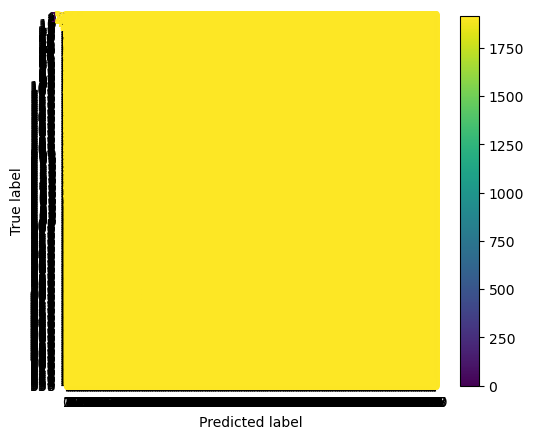

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

# Modeli oluşturma
model = LogisticRegression(max_iter=1000)

# Modeli eğitim verileri ile eğitme
model.fit(X_train, y_train)

# Test verileri ile tahmin yapma
y_pred = model.predict(X_test)

# Karmaşıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
ConfusionMatrixDisplay(cm).plot()

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')